# Differential Gene Expression

In single cell, differential expresison can have multiple functionalities such as of identifying marker genes for cell populations, as well as differentially regulated genes across conditions (healthy vs control). We will also exercise on how to account the batch information in your test.

Differential expression is performed with the function rank_genes_group. The default method to compute differential expression is the t-test_overestim_var. Other implemented methods are: logreg, t-test and wilcoxon.

By default, the .raw attribute of AnnData is used in case it has been initialized, it can be changed by setting use_raw=False.

The clustering with resolution 0.6 seems to give a reasonable number of clusters, so we will use that clustering for all DE tests.

For Differential Expression we need all genes and 

In [ ]:
#@title Load Filtered, Integrated clustered data

adata = sc.read_h5ad('Objects/sc_QCNFSDM_scCorrected__clustered_covid.h5ad')
adata

AnnData object with n_obs × n_vars = 9000 × 2000
    obs: 'type', 'sample', 'batch', 'leiden_1.0', 'leiden_0.6', 'leiden_0.4', 'leiden_1.4', 'louvain_1.0', 'louvain_0.6', 'louvain_0.4', 'louvain_1.4', 'kmeans5', 'kmeans10', 'kmeans15'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'dendrogram_leiden_0.6', 'dendrogram_louvain_0.4', 'dendrogram_louvain_0.6', 'dendrogram_louvain_1.0', 'hvg', 'kmeans10_colors', 'kmeans15_colors', 'kmeans5_colors', 'leiden', 'leiden_0.4_colors', 'leiden_0.6_colors', 'leiden_1.0_colors', 'leiden_1.4_colors', 'log1p', 'louvain', 'louvain_0.4_colors', 'louvain_0.6_colors', 'louvain_1.0_colors', 'louvain_1.4_colors', 'neighbors', 'pca', 'sample_colors', 'tsne', 'type_colors', 'umap'
    obsm: 'Scanorama', 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'logcounts'
    obsp: 'connectivities', 'distances'

In [ ]:
#@title load Raw Data

adata.raw = sc.read_h5ad('/content/drive/MyDrive/scRNA_using_Python/Objects/adata_raw_covid.h5ad')
adata.raw

In [ ]:
print(adata.raw.X[:10,:10])

In [ ]:
print(adata.X.shape)
print(adata.raw.X.shape)



(9000, 2000)
(9000, 33538)


In [ ]:
adata_raw

AnnData object with n_obs × n_vars = 9000 × 21830
    obs: 'type', 'sample', 'batch', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'sample_colors', 'type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'logcounts'
    obsp: 'distances', 'connectivities'

In [ ]:
adata

AnnData object with n_obs × n_vars = 9000 × 33538
    obs: 'type', 'sample', 'batch', 'leiden_1.0', 'leiden_0.6', 'leiden_0.4', 'leiden_1.4', 'louvain_1.0', 'louvain_0.6', 'louvain_0.4', 'louvain_1.4', 'kmeans5', 'kmeans10', 'kmeans15', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'dendrogram_leiden_0.6', 'dendrogram_louvain_0.4', 'dendrogram_louvain_0.6', 'dendrogram_louvain_1.0', 'hvg', 'kmeans10_colors', 'kmeans15_colors', 'kmeans5_colors', 'leiden', 'leiden_0.4_colors', 'leiden_0.6_colors', 'leiden_1.0_colors', 'leiden_1.4_colors', 'log1p', 'louvain', 'louvain_0.4_colors', 'louvain_0.6_colors', 'louvain_1.0_colors', 'louvain_1.4_colors', 'neighbors', 'pca', 'sample_colors', 'tsne', 'type_colors', 'umap', 't-test', 't-test_ov', 'wilcoxon'
    obsm: 'Scanorama', 'X_pca', 'X_tsne', 'X_umap'
    obsp: 'connectivities', 'distances'

For DGE analysis we would like to run with all genes, but on normalized values, so we will have to revert back to the raw matrix and renormalize.

We can't see Louvain_0.6 but it exist

Index(['AGGGTCCCATGACCCG-1-0', 'TACCCACAGCGGGTTA-1-0', 'CCCAACTTCATATGGC-1-0',
       'TCAAGTGTCCGAACGC-1-0', 'ATTCCTAGTGACTGTT-1-0', 'GTGTTCCGTGGGCTCT-1-0',
       'CCTAAGACAGATTAAG-1-0', 'AATAGAGAGGGTTAGC-1-0', 'GGGTCACTCACCTACC-1-0',
       'TCCTCTTGTACAGTCT-1-0',
       ...
       'TATTGGGAGGCTTTCA-14-5', 'TATTGGGGTGAGTCAG-14-5',
       'GCCAACGGTCAGGAGT-14-5', 'TTTCACAGTTCCATTT-14-5',
       'GCTGCAGTCTGTCAGA-14-5', 'CGCATAATCTTACGGA-14-5',
       'GAGGCCTTCTCCTGCA-14-5', 'CCCTAACAGTTTCTTC-14-5',
       'GGGATGATCAAGCTTG-14-5', 'CAATGACCACTGCATA-14-5'],
      dtype='object', length=9000)

In [ ]:
adata = adata.raw.to_adata()
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [ ]:
adata

AnnData object with n_obs × n_vars = 9000 × 33538
    obs: 'type', 'sample', 'batch', 'leiden_1.0', 'leiden_0.6', 'leiden_0.4', 'leiden_1.4', 'louvain_1.0', 'louvain_0.6', 'louvain_0.4', 'louvain_1.4', 'kmeans5', 'kmeans10', 'kmeans15', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'dendrogram_leiden_0.6', 'dendrogram_louvain_0.4', 'dendrogram_louvain_0.6', 'dendrogram_louvain_1.0', 'hvg', 'kmeans10_colors', 'kmeans15_colors', 'kmeans5_colors', 'leiden', 'leiden_0.4_colors', 'leiden_0.6_colors', 'leiden_1.0_colors', 'leiden_1.4_colors', 'log1p', 'louvain', 'louvain_0.4_colors', 'louvain_0.6_colors', 'louvain_1.0_colors', 'louvain_1.4_colors', 'neighbors', 'pca', 'sample_colors', 'tsne', 'type_colors', 'umap'
    obsm: 'Scanorama', 'X_pca', 'X_tsne', 'X_umap'
    obsp: 'connectivities', 'distances'

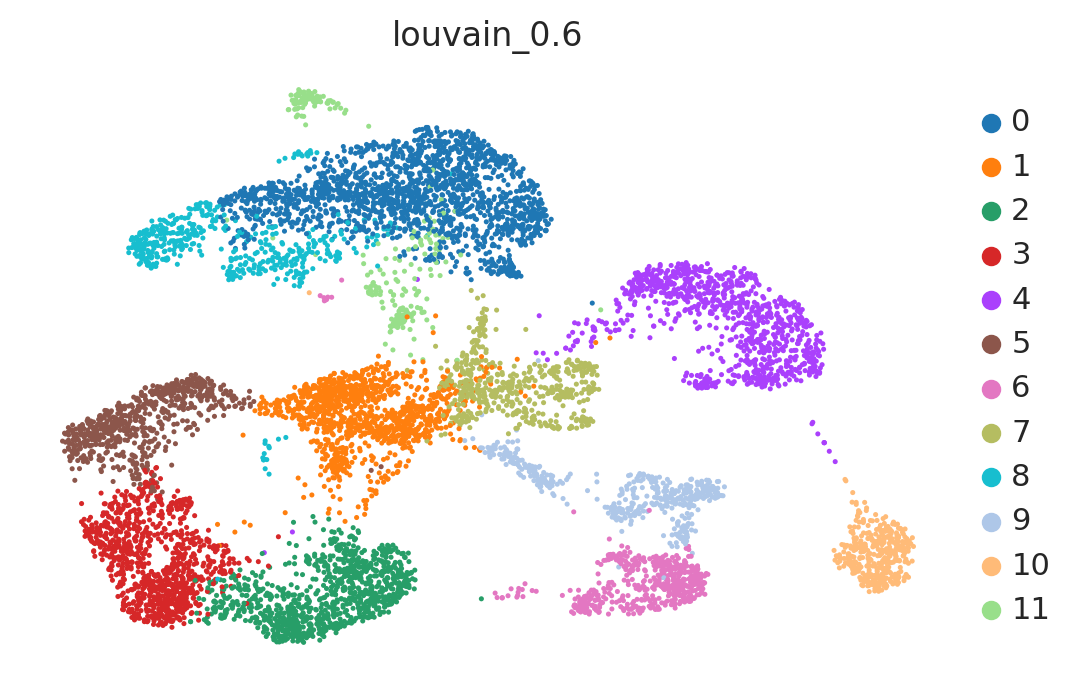

In [ ]:
sc.pl.umap(adata, color='louvain_0.6')

### Tests

#### T-test

In [ ]:
sc.tl.rank_genes_groups(adata, 'louvain_0.6', method='t-test', key_added = "t-test")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key = "t-test")

NameError: ignored

In [ ]:
# results are stored in the adata.uns["t-test"] slot
adata

AnnData object with n_obs × n_vars = 9000 × 33538
    obs: 'type', 'sample', 'batch', 'leiden_1.0', 'leiden_0.6', 'leiden_0.4', 'leiden_1.4', 'louvain_1.0', 'louvain_0.6', 'louvain_0.4', 'louvain_1.4', 'kmeans5', 'kmeans10', 'kmeans15', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'dendrogram_leiden_0.6', 'dendrogram_louvain_0.4', 'dendrogram_louvain_0.6', 'dendrogram_louvain_1.0', 'hvg', 'kmeans10_colors', 'kmeans15_colors', 'kmeans5_colors', 'leiden', 'leiden_0.4_colors', 'leiden_0.6_colors', 'leiden_1.0_colors', 'leiden_1.4_colors', 'log1p', 'louvain', 'louvain_0.4_colors', 'louvain_0.6_colors', 'louvain_1.0_colors', 'louvain_1.4_colors', 'neighbors', 'pca', 'sample_colors', 'tsne', 'type_colors', 'umap', 't-test'
    obsm: 'Scanorama', 'X_pca', 'X_tsne', 'X_umap'
    obsp: 'connectivities', 'distances'

#### T-test overestimated_variance

ranking genes
    finished: added to `.uns['t-test_ov']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


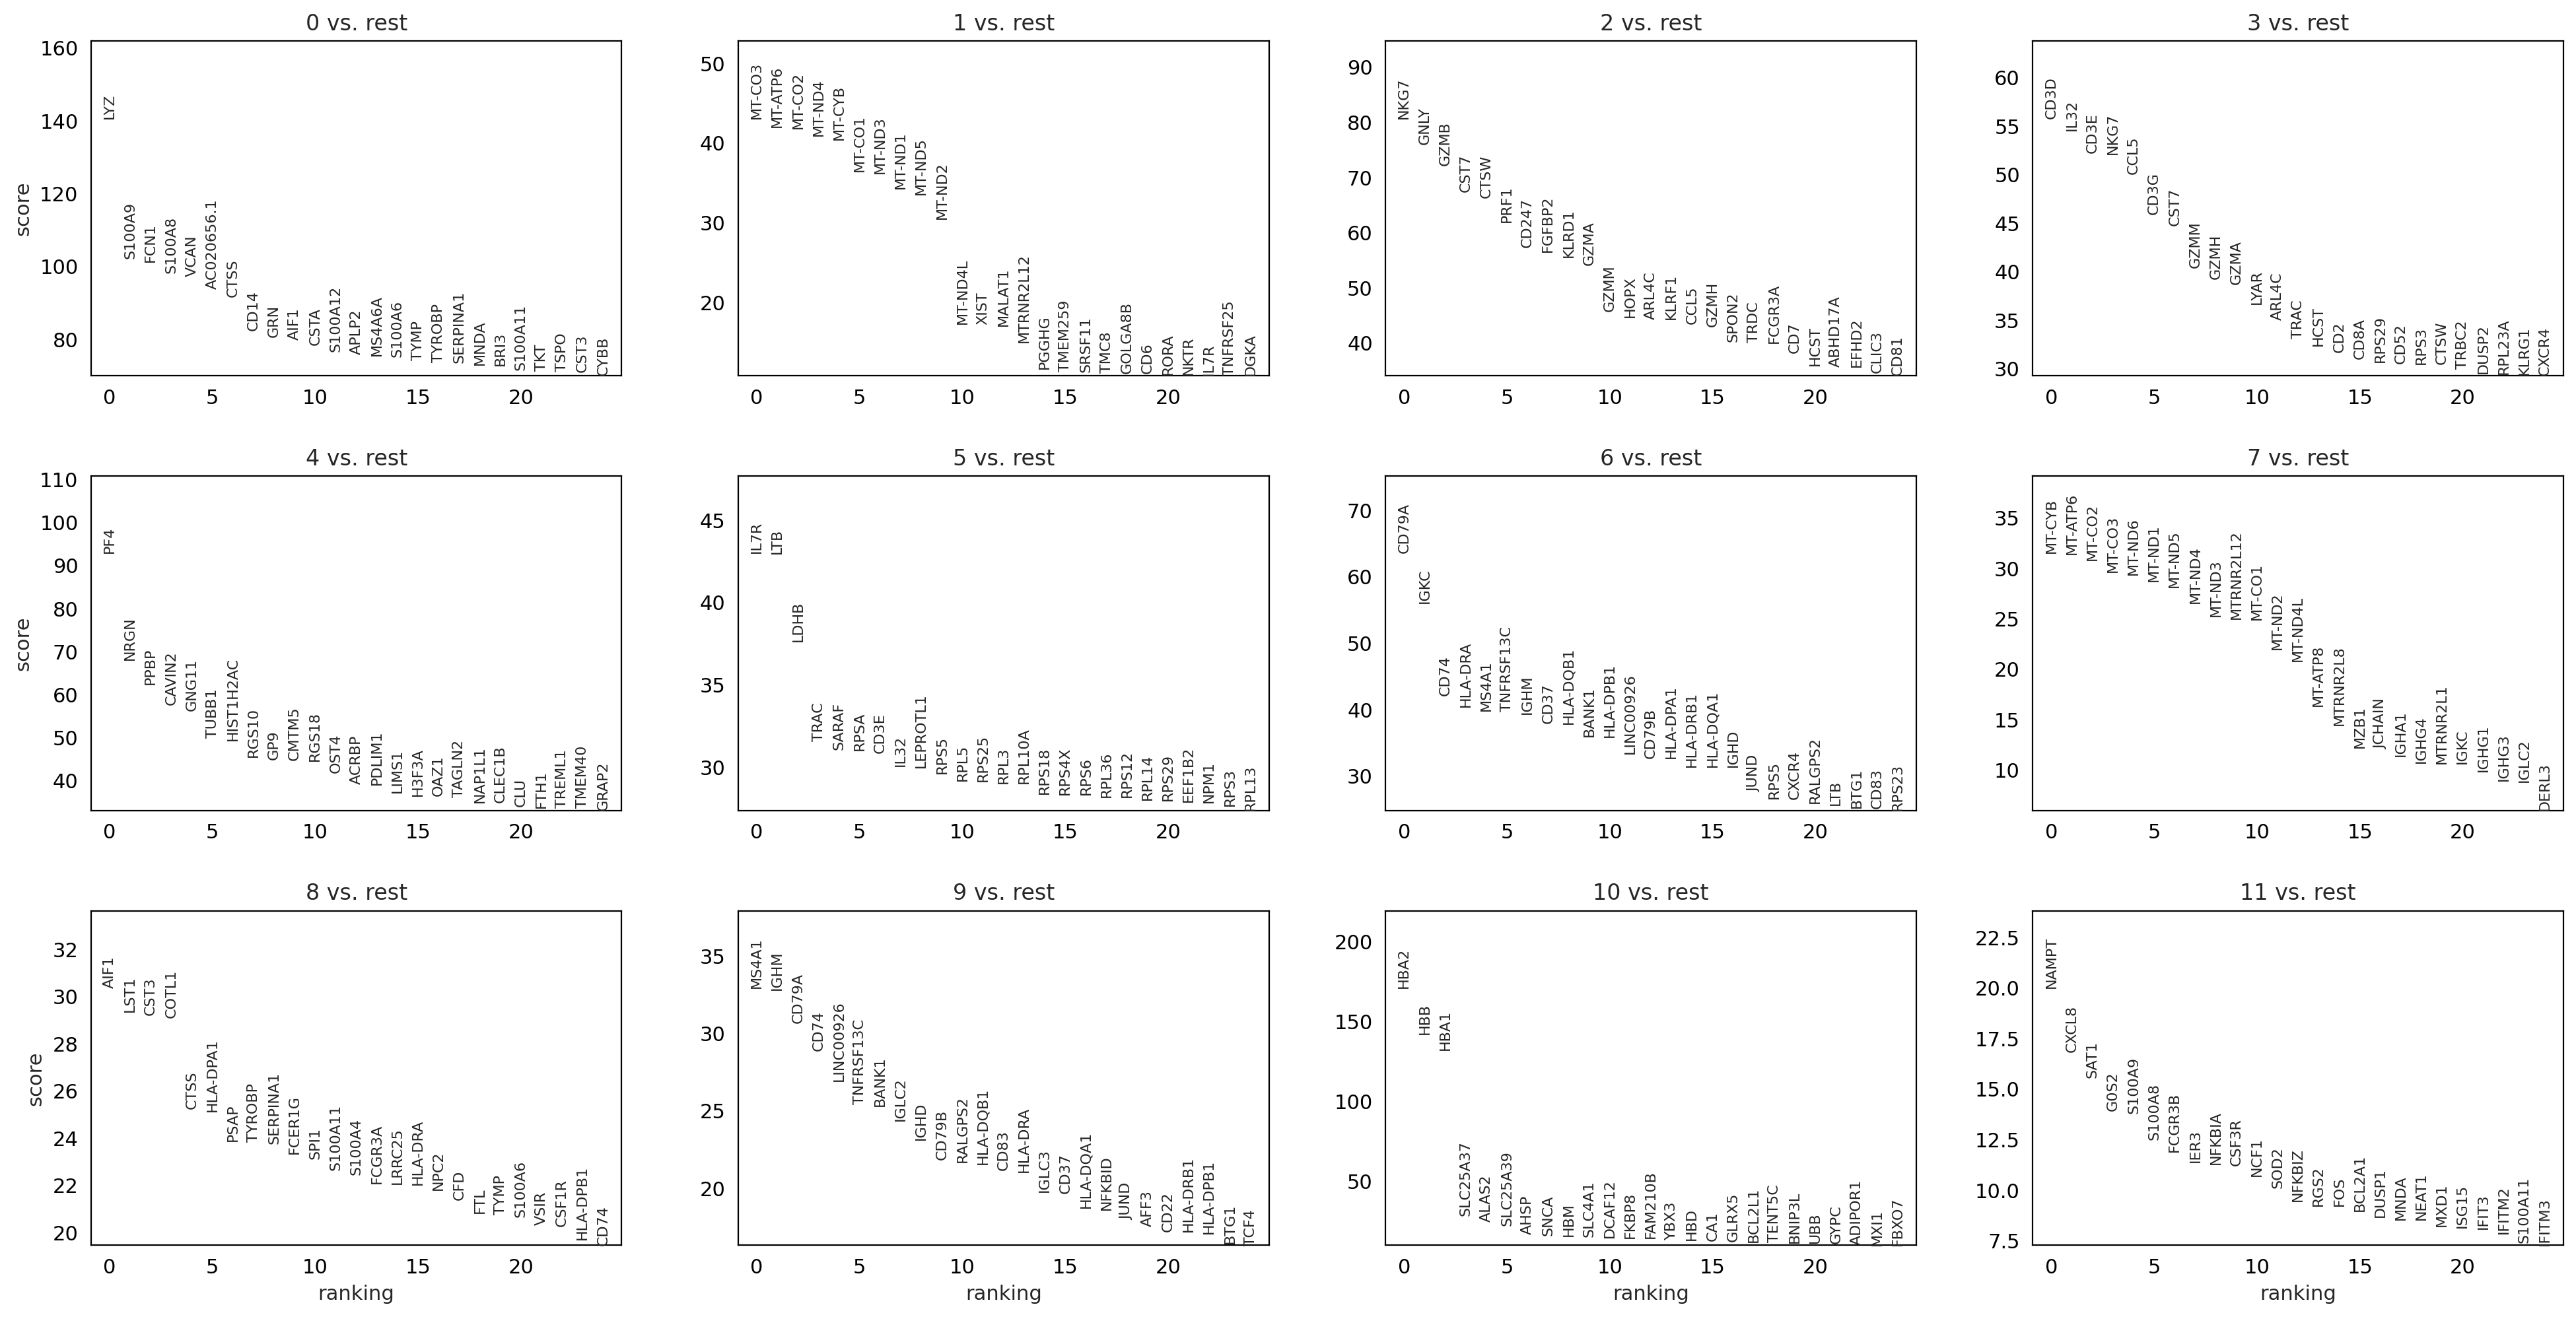

In [ ]:
sc.tl.rank_genes_groups(adata, 'louvain_0.6', method='t-test_overestim_var', key_added = "t-test_ov")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key = "t-test_ov")

#### Wilcoxon rank-sum

ranking genes
    finished: added to `.uns['wilcoxon']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:33)


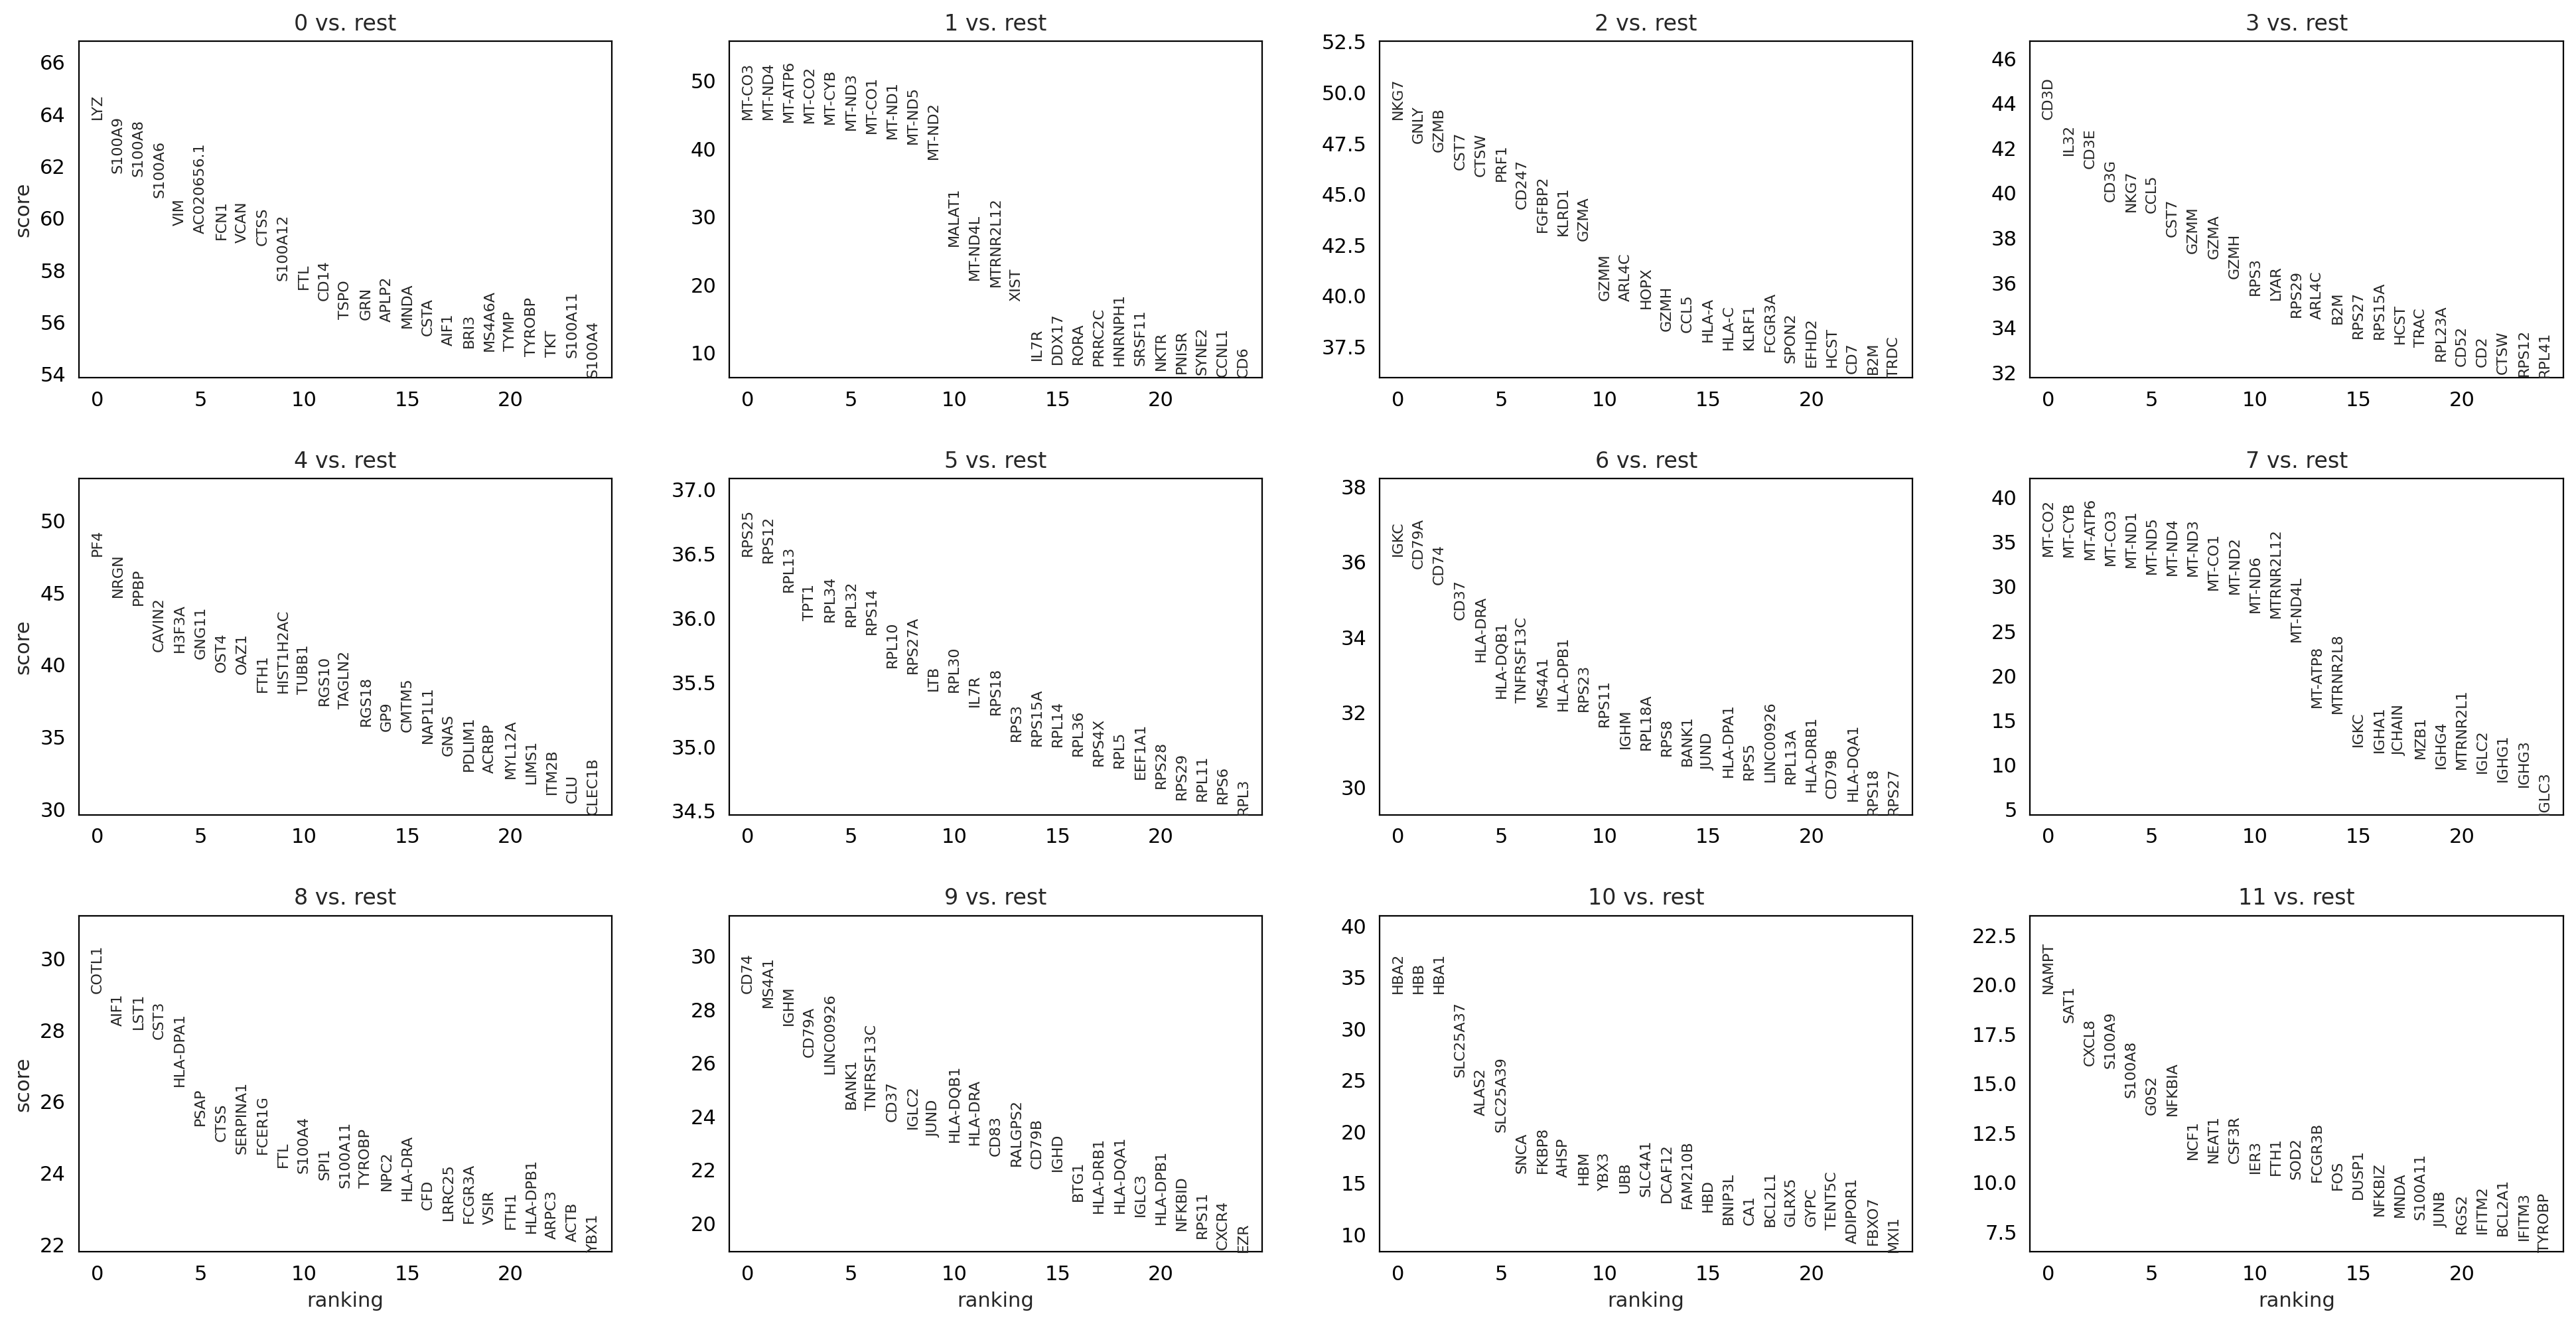

In [ ]:
sc.tl.rank_genes_groups(adata, 'louvain_0.6', method='wilcoxon', key_added = "wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key="wilcoxon")

#### logistic regression (logres)

ranking genes
    finished: added to `.uns['logreg']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
 (0:00:58)


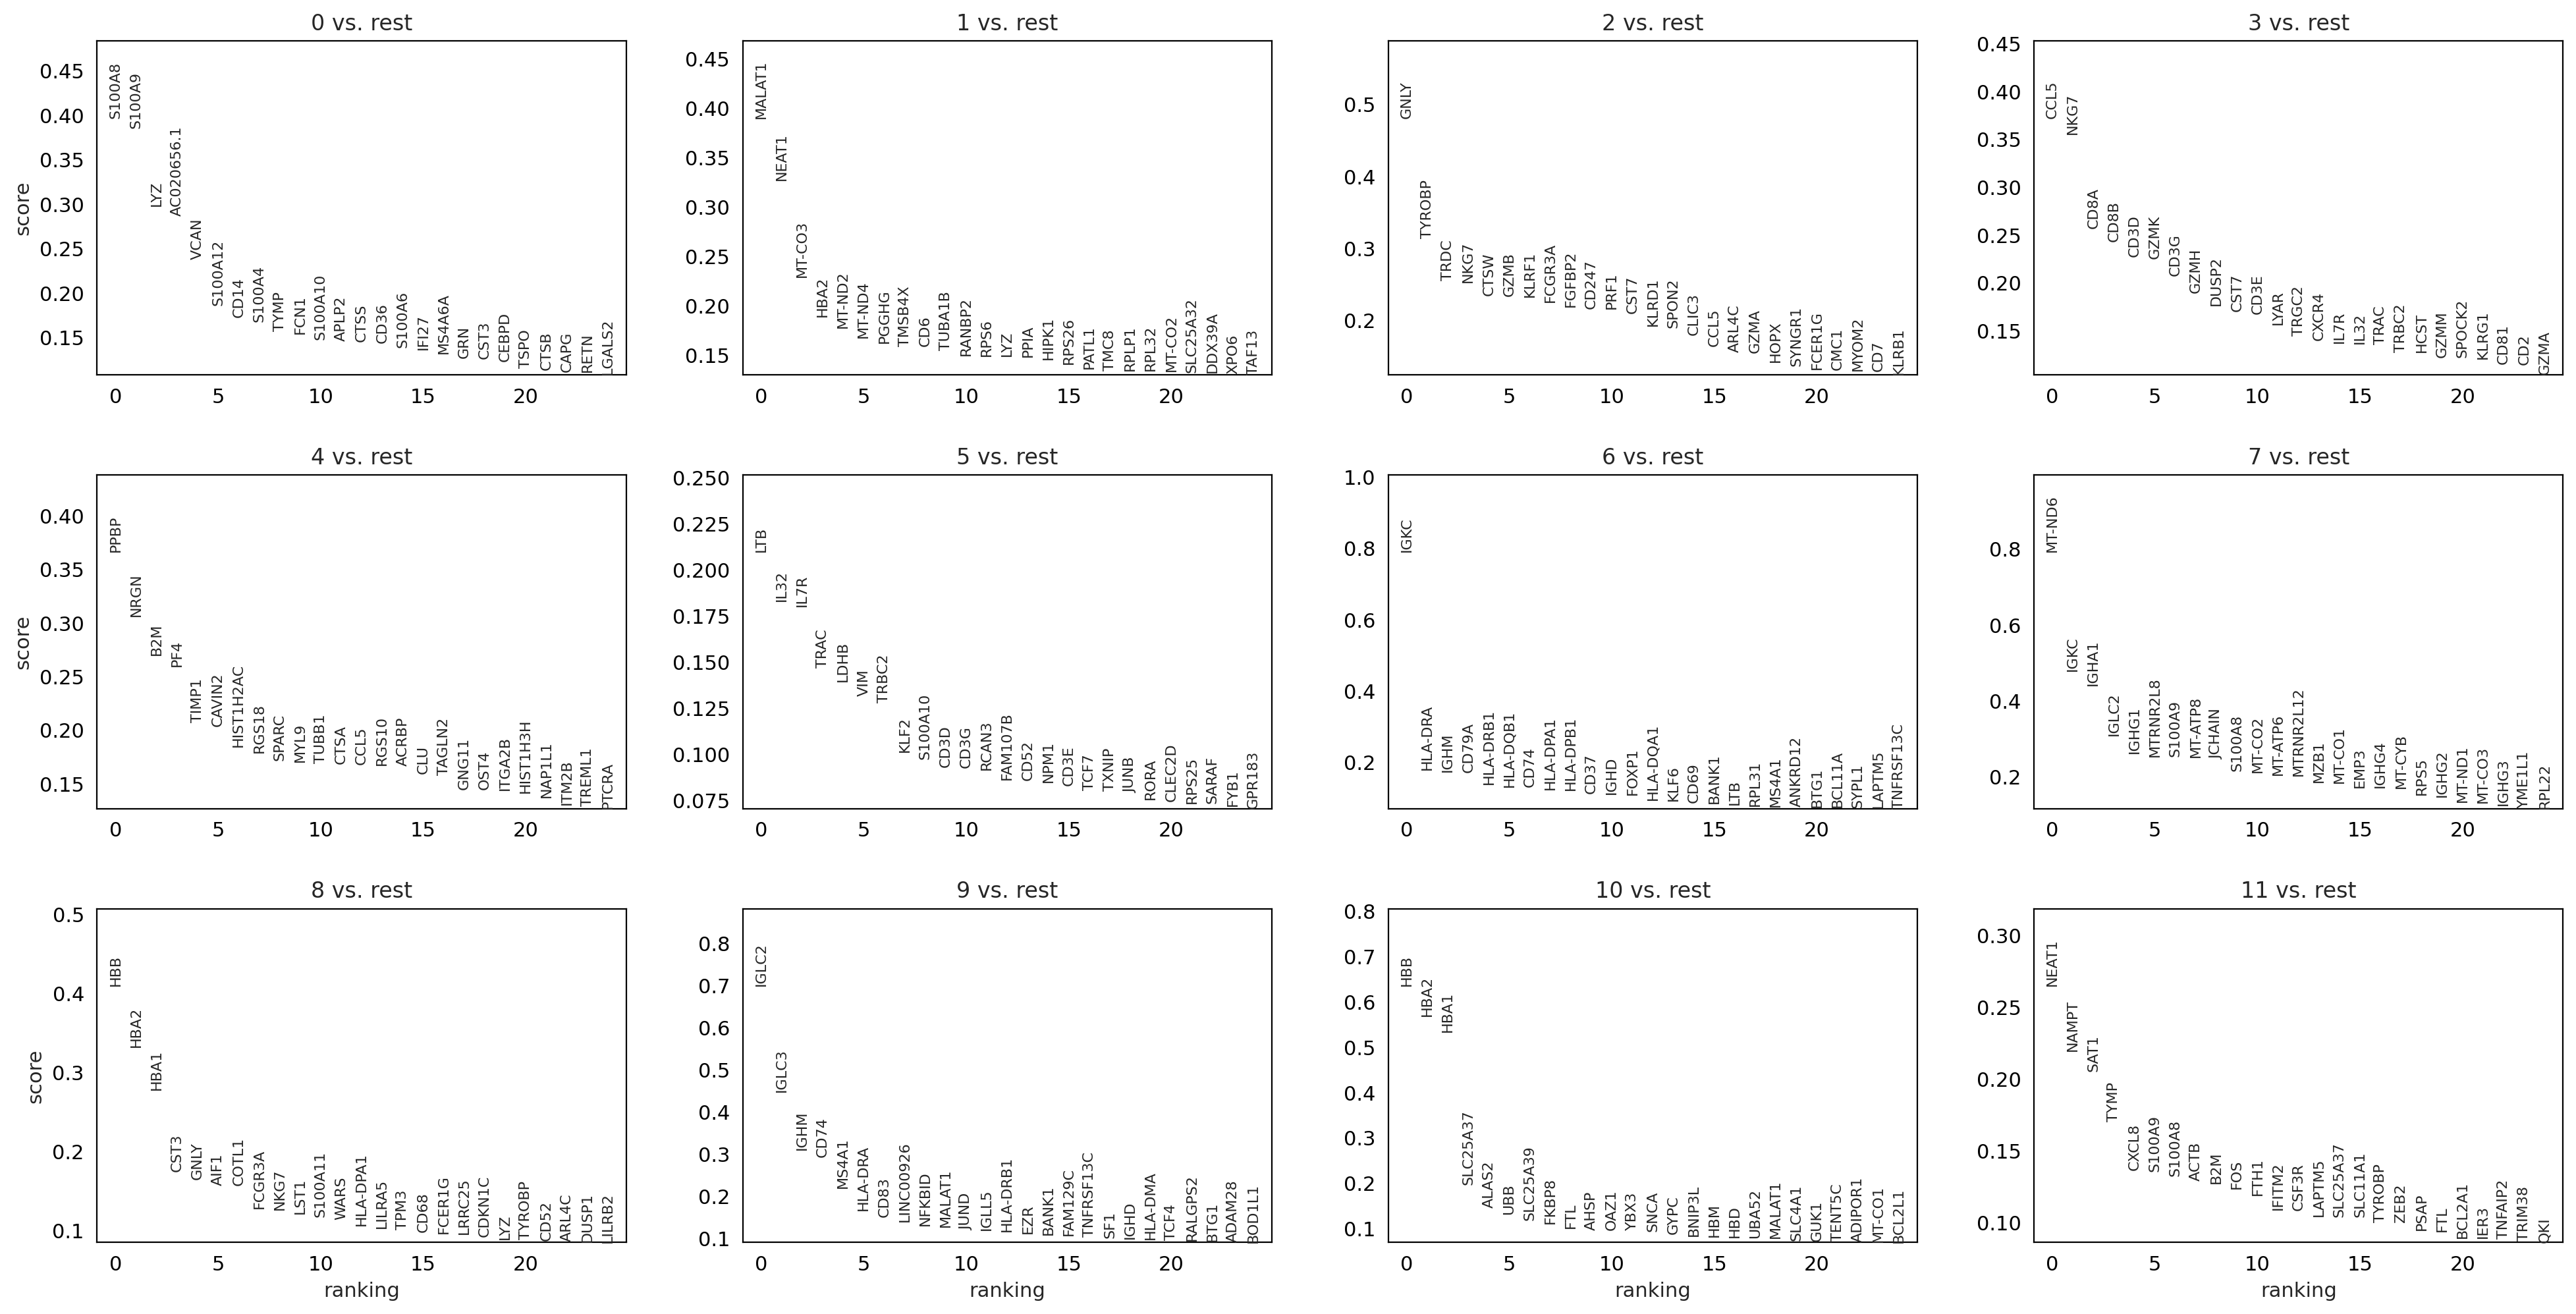

In [ ]:

sc.tl.rank_genes_groups(adata, 'louvain_0.6', method='logreg',key_added = "logreg")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key = "logreg")

### Compare Genes

In [ ]:
adata

AnnData object with n_obs × n_vars = 9000 × 33538
    obs: 'type', 'sample', 'batch', 'leiden_1.0', 'leiden_0.6', 'leiden_0.4', 'leiden_1.4', 'louvain_1.0', 'louvain_0.6', 'louvain_0.4', 'louvain_1.4', 'kmeans5', 'kmeans10', 'kmeans15', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'dendrogram_leiden_0.6', 'dendrogram_louvain_0.4', 'dendrogram_louvain_0.6', 'dendrogram_louvain_1.0', 'hvg', 'kmeans10_colors', 'kmeans15_colors', 'kmeans5_colors', 'leiden', 'leiden_0.4_colors', 'leiden_0.6_colors', 'leiden_1.0_colors', 'leiden_1.4_colors', 'log1p', 'louvain', 'louvain_0.4_colors', 'louvain_0.6_colors', 'louvain_1.0_colors', 'louvain_1.4_colors', 'neighbors', 'pca', 'sample_colors', 'tsne', 'type_colors', 'umap', 't-test', 'logreg', 'wilcoxon', 't-test_ov'
    obsm: 'Scanorama', 'X_pca', 'X_tsne', 'X_umap'
    obsp: 'connectivities', 'distances'

Take all significant DE genes for cluster0 with each test and compare the overlap

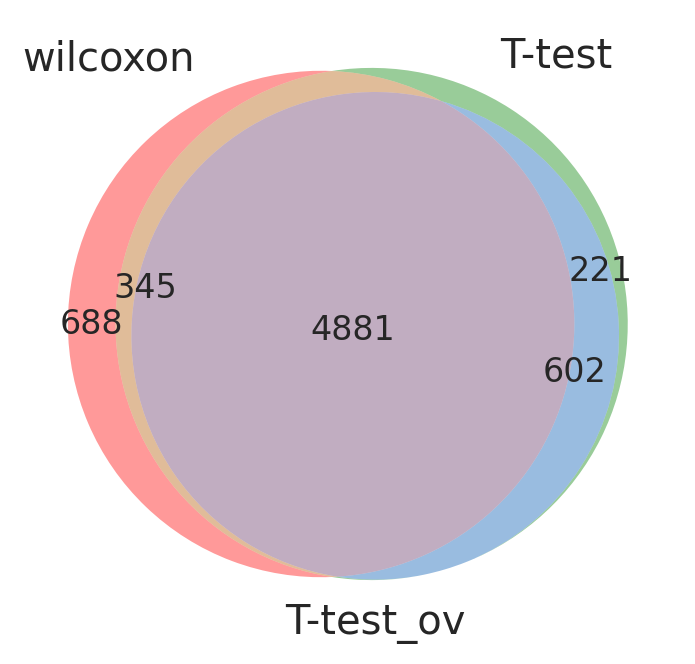

In [ ]:
#compare cluster1 genes, only stores top 100 by default

wc = sc.get.rank_genes_groups_df(adata, group='0', key= 'wilcoxon', pval_cutoff=0.01, log2fc_min=0)['names']
tt = sc.get.rank_genes_groups_df(adata, group='0', key='t-test', pval_cutoff=0.01, log2fc_min=0)['names']
tt_ov = sc.get.rank_genes_groups_df(adata, group='0', key='t-test_ov', pval_cutoff=0.01, log2fc_min=0)['names']

from matplotlib_venn import venn3

venn3([set(wc),set(tt),set(tt_ov)], ('wilcoxon','T-test','T-test_ov') )
plt.show()

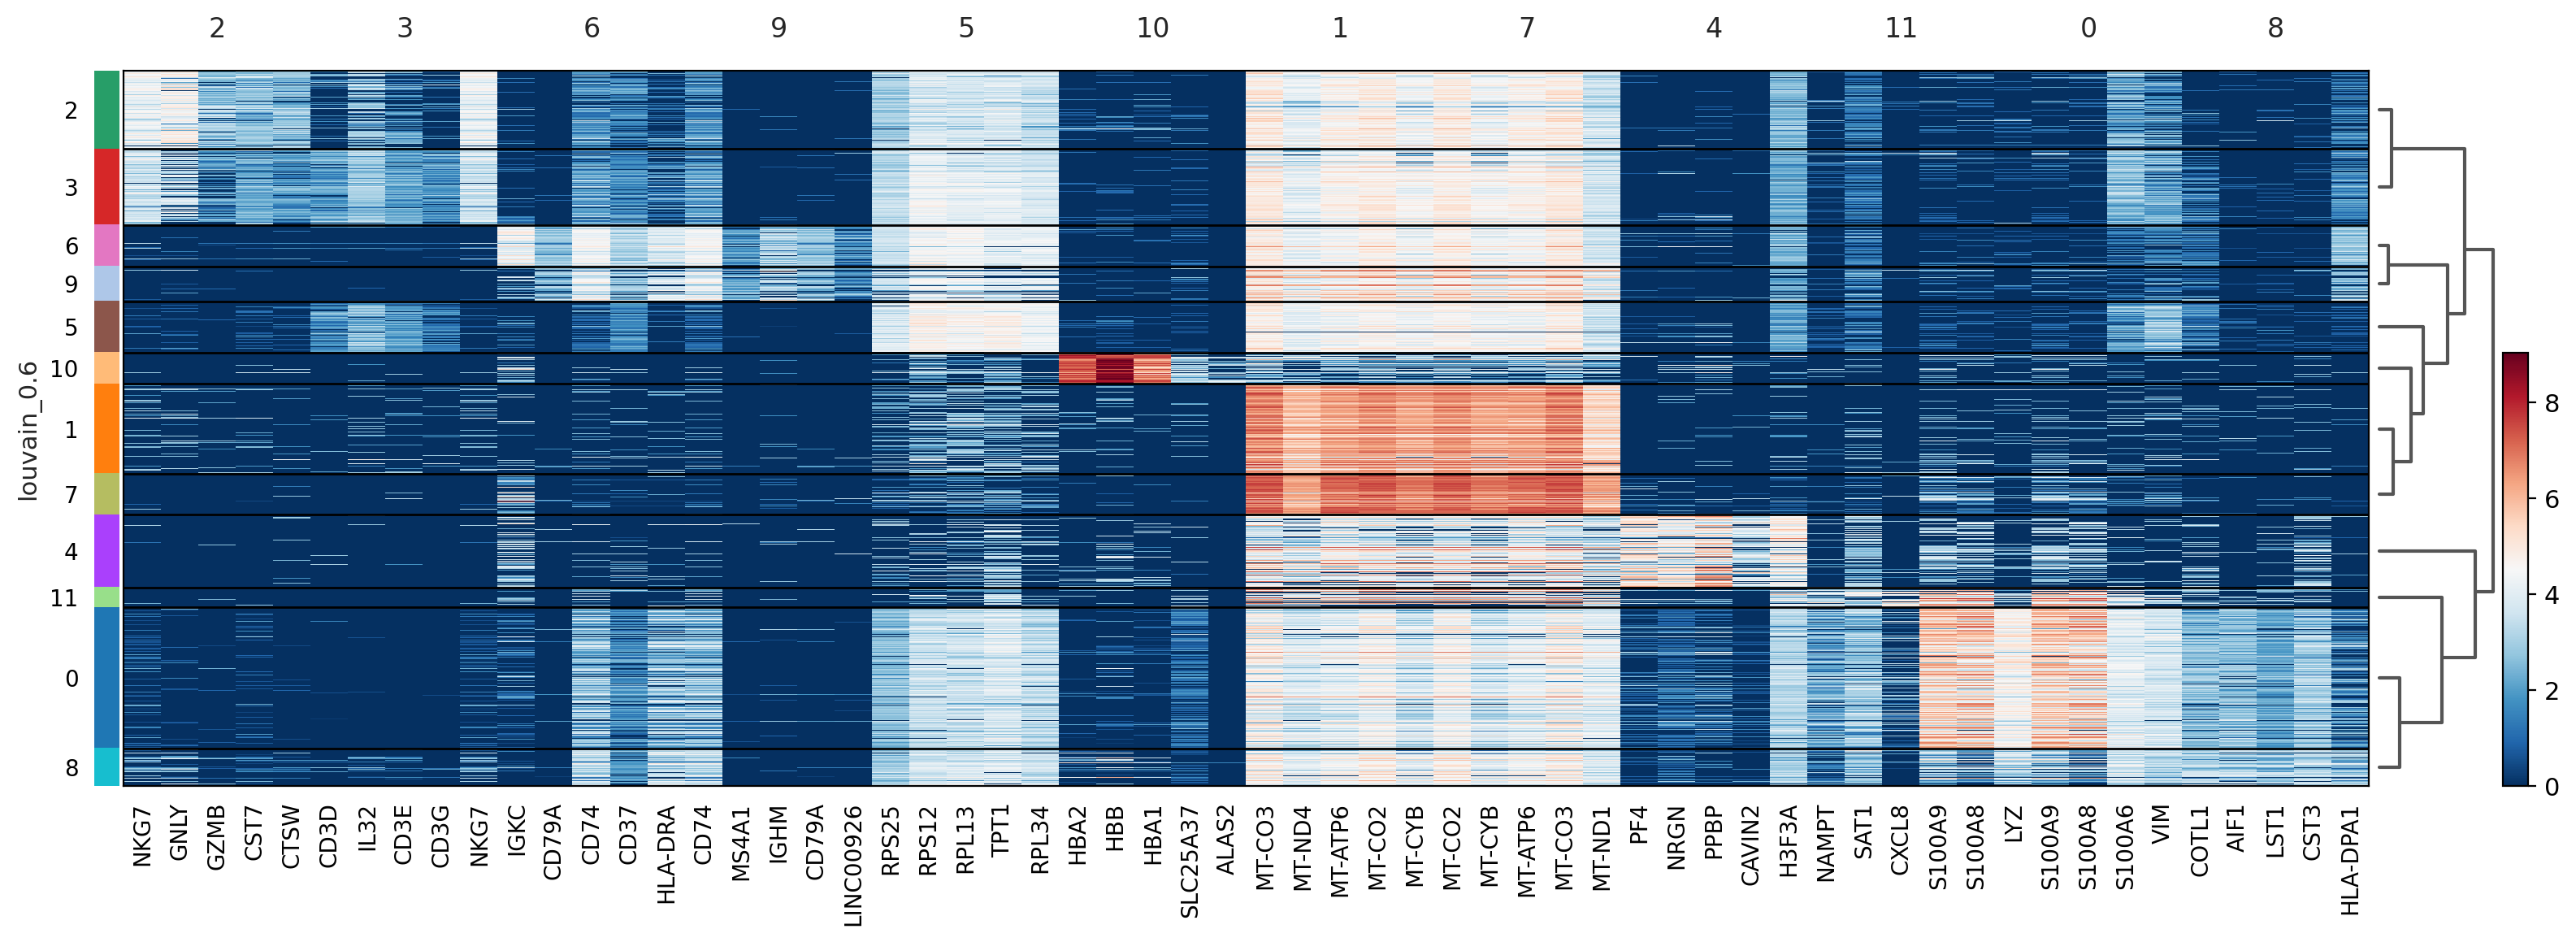

In [ ]:
#@title Heatmap of genes 
sc.pl.rank_genes_groups_heatmap(adata, n_genes=5, key="wilcoxon", groupby="louvain_0.6", show_gene_labels=True)

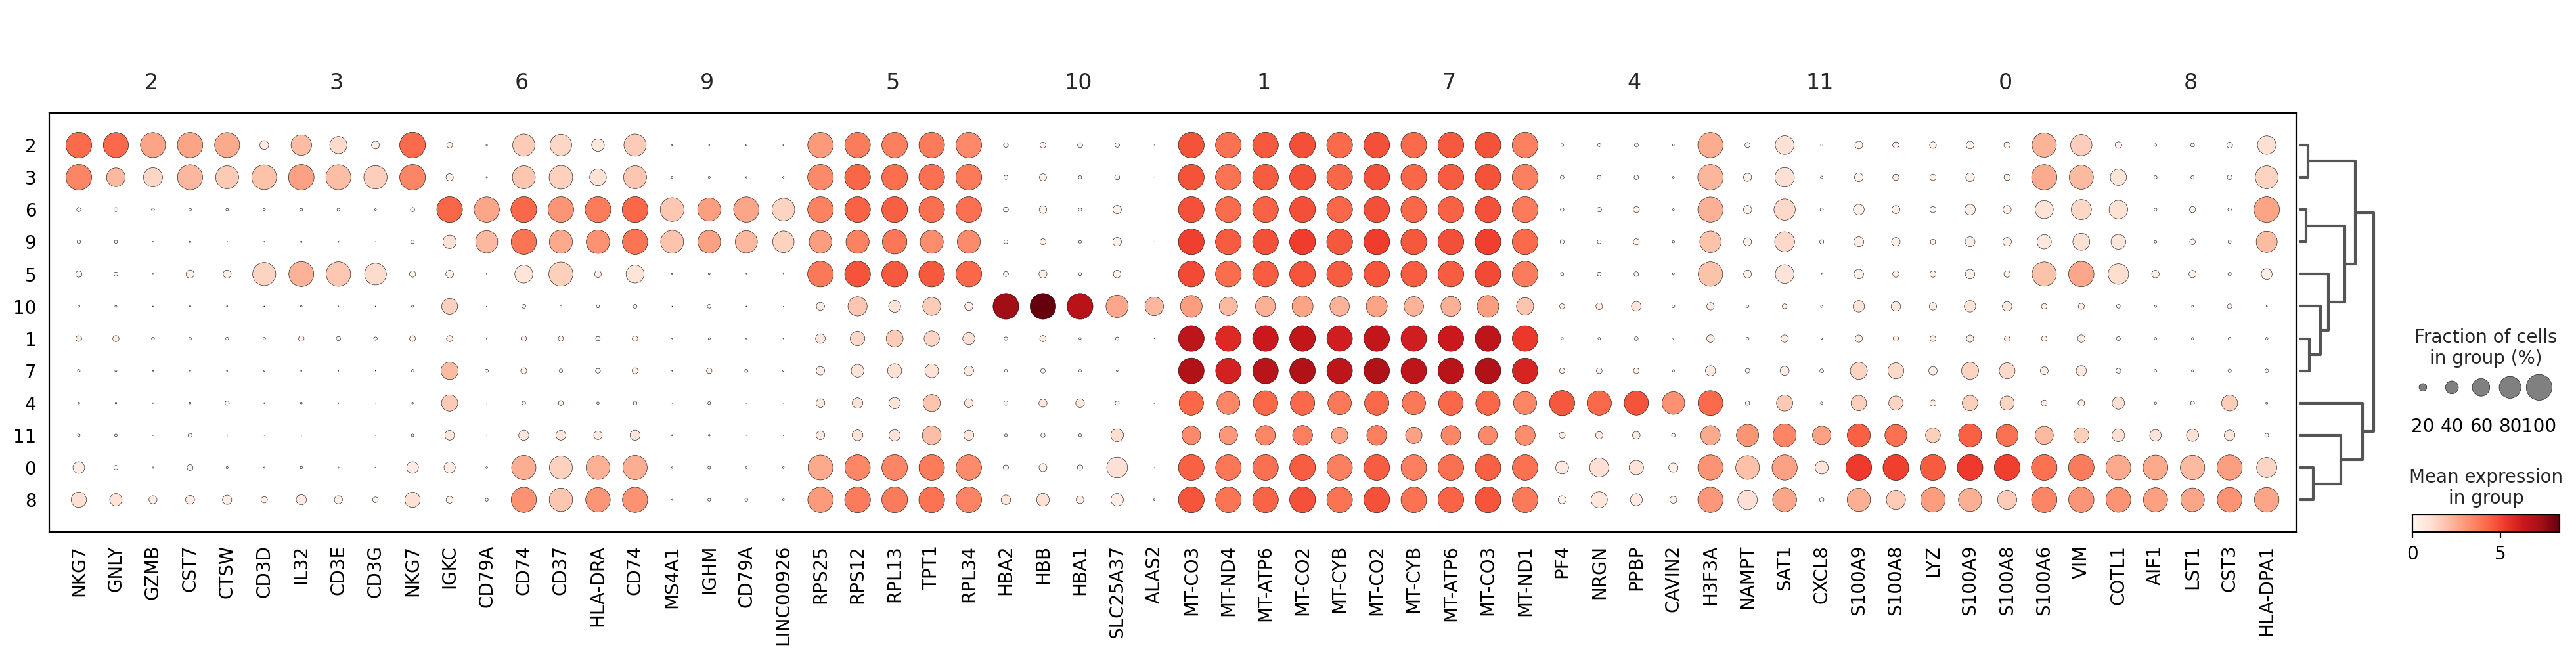

In [ ]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5, key="wilcoxon", groupby="louvain_0.6")

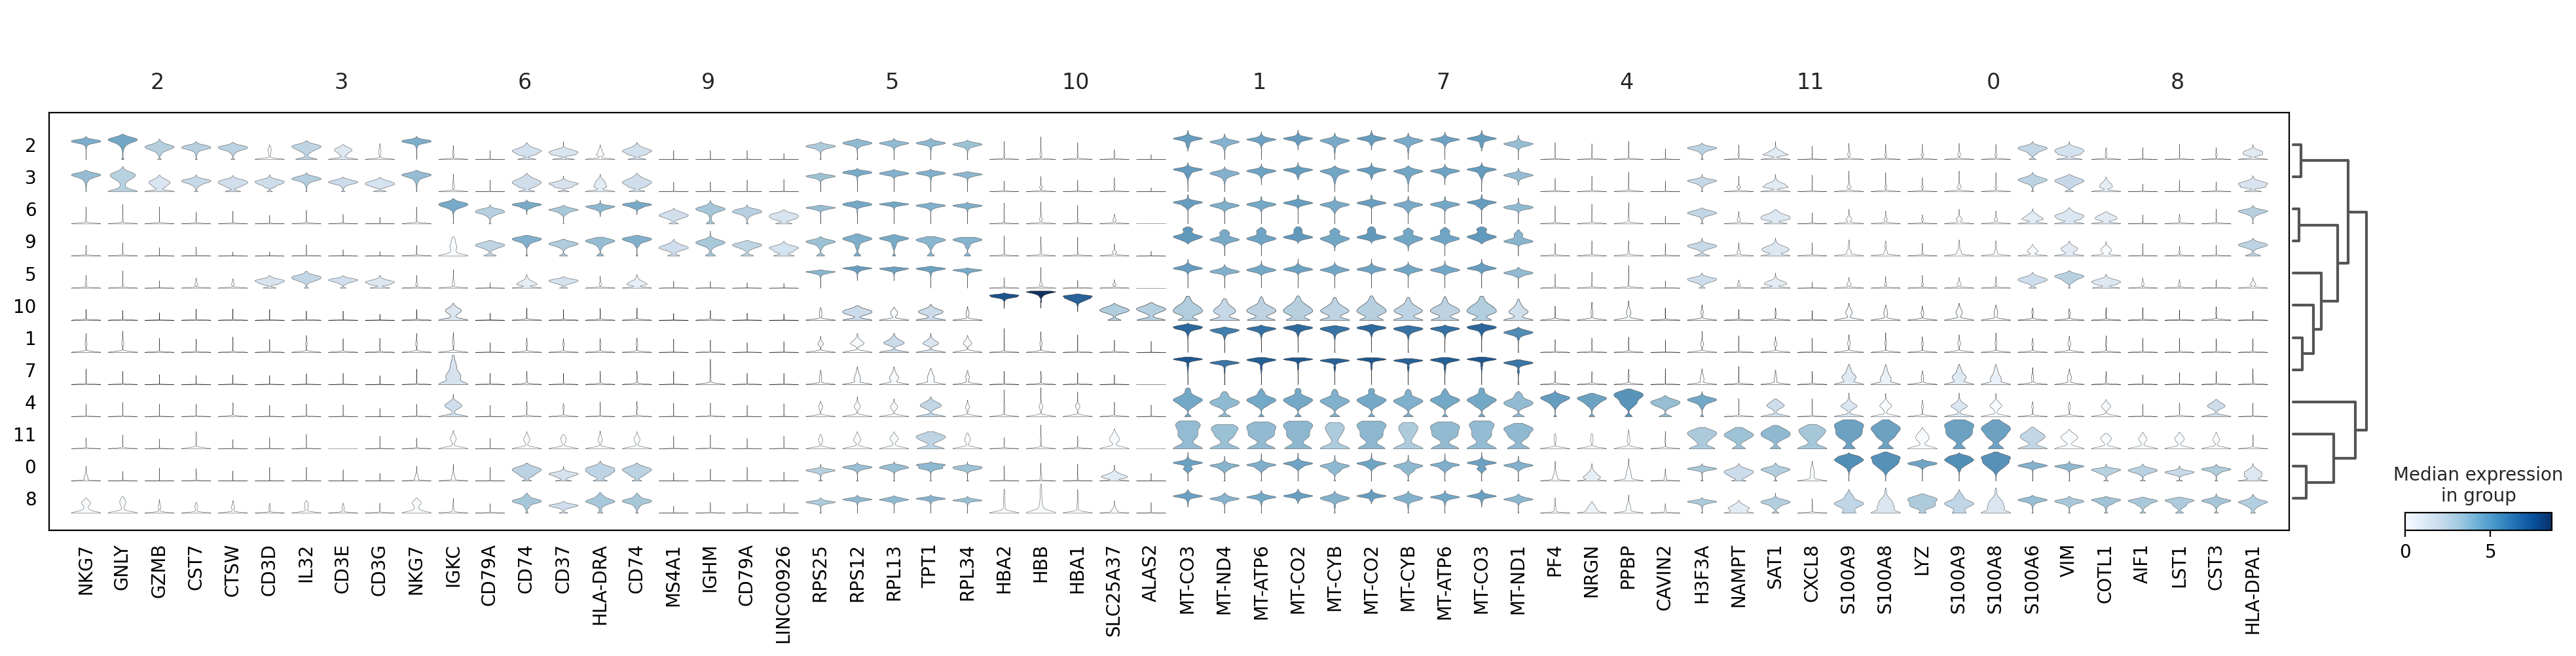

In [ ]:
sc.pl.rank_genes_groups_stacked_violin(adata, n_genes=5, key="wilcoxon", groupby="louvain_0.6")

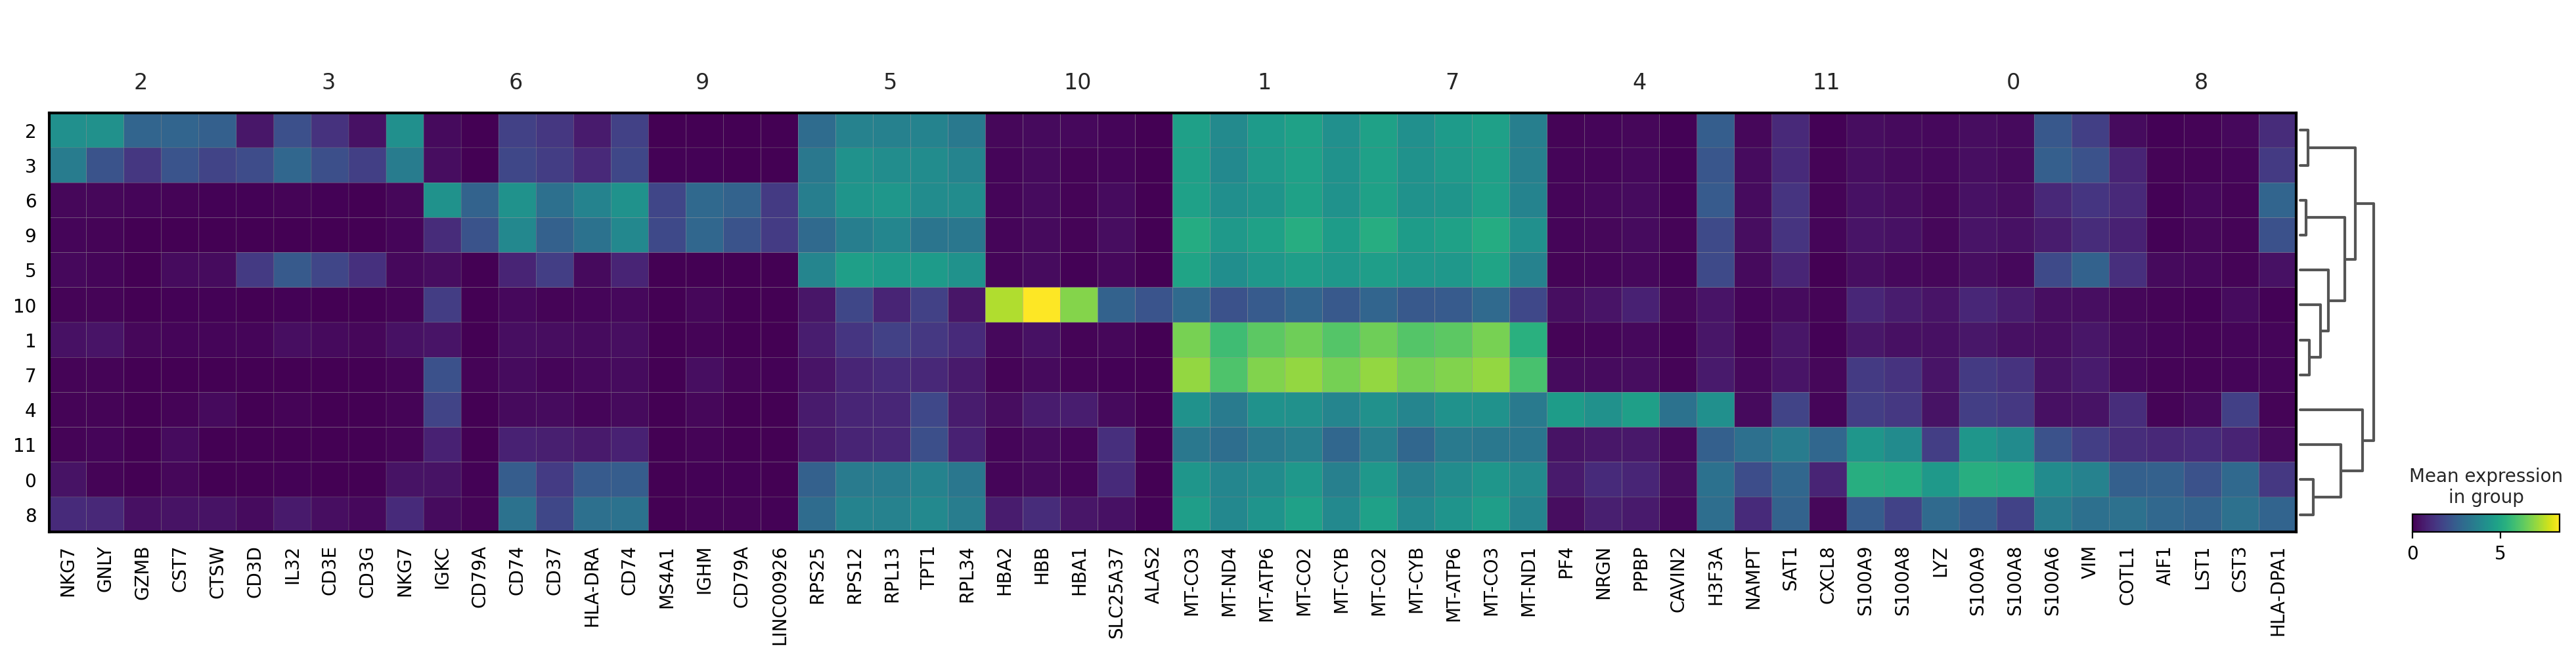

In [ ]:
sc.pl.rank_genes_groups_matrixplot(adata, n_genes=5, key="wilcoxon", groupby="louvain_0.6")

### Compare specific clusters

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)


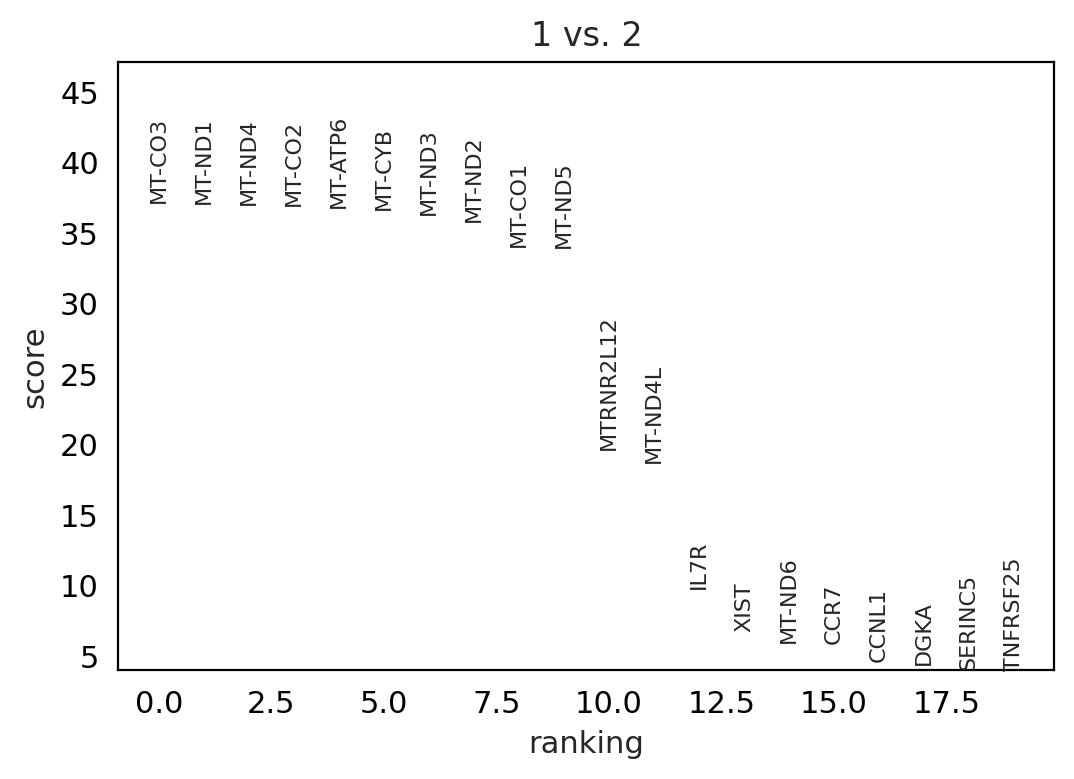

In [ ]:
#@title cluster1 vs cluster2

sc.tl.rank_genes_groups(adata, 'louvain_0.6', groups=['1'], reference='2', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['1'], n_genes=20)

In [ ]:
adata

AnnData object with n_obs × n_vars = 9000 × 33538
    obs: 'type', 'sample', 'batch', 'leiden_1.0', 'leiden_0.6', 'leiden_0.4', 'leiden_1.4', 'louvain_1.0', 'louvain_0.6', 'louvain_0.4', 'louvain_1.4', 'kmeans5', 'kmeans10', 'kmeans15', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'dendrogram_leiden_0.6', 'dendrogram_louvain_0.4', 'dendrogram_louvain_0.6', 'dendrogram_louvain_1.0', 'hvg', 'kmeans10_colors', 'kmeans15_colors', 'kmeans5_colors', 'leiden', 'leiden_0.4_colors', 'leiden_0.6_colors', 'leiden_1.0_colors', 'leiden_1.4_colors', 'log1p', 'louvain', 'louvain_0.4_colors', 'louvain_0.6_colors', 'louvain_1.0_colors', 'louvain_1.4_colors', 'neighbors', 'pca', 'sample_colors', 'tsne', 'type_colors', 'umap', 't-test', 'logreg', 'wilcoxon', 't-test_ov', 'rank_genes_groups'
    obsm: 'Scanorama', 'X_pca', 'X_tsne', 'X_umap'
    obsp: 'connectivities', 'distances'

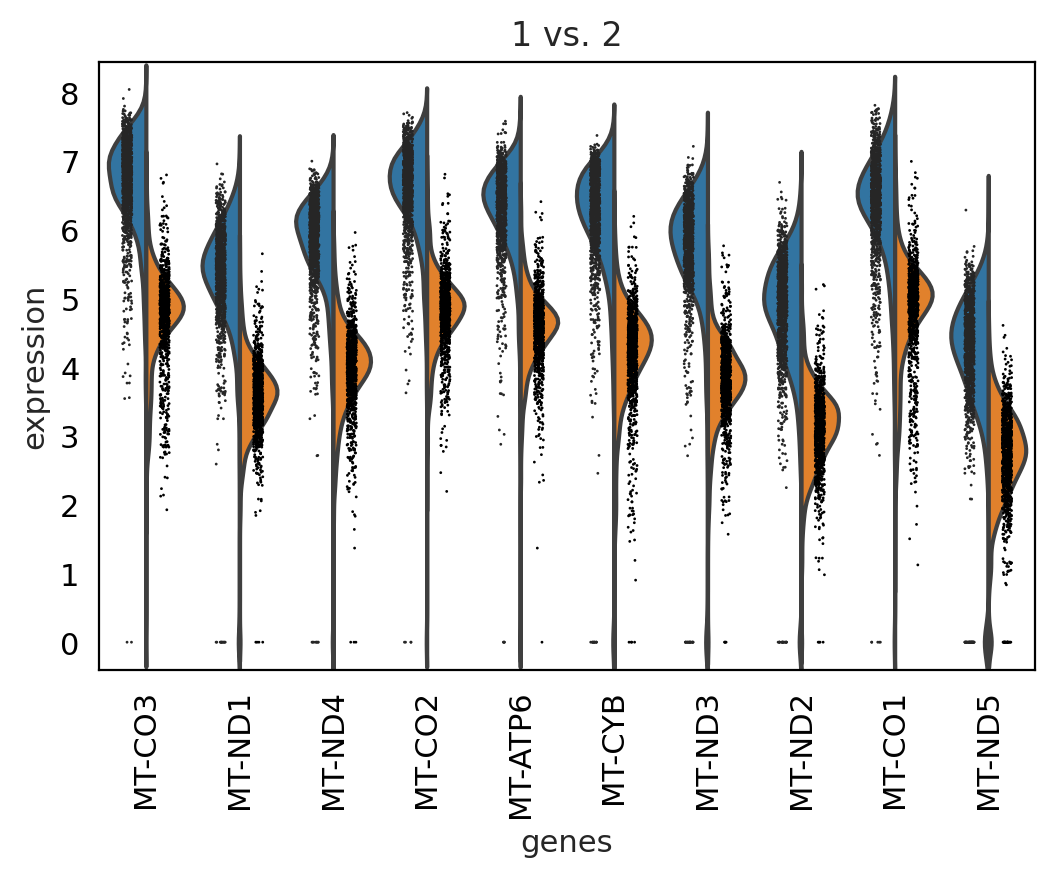

In [ ]:
sc.pl.rank_genes_groups_violin(adata, groups='1', n_genes=10)

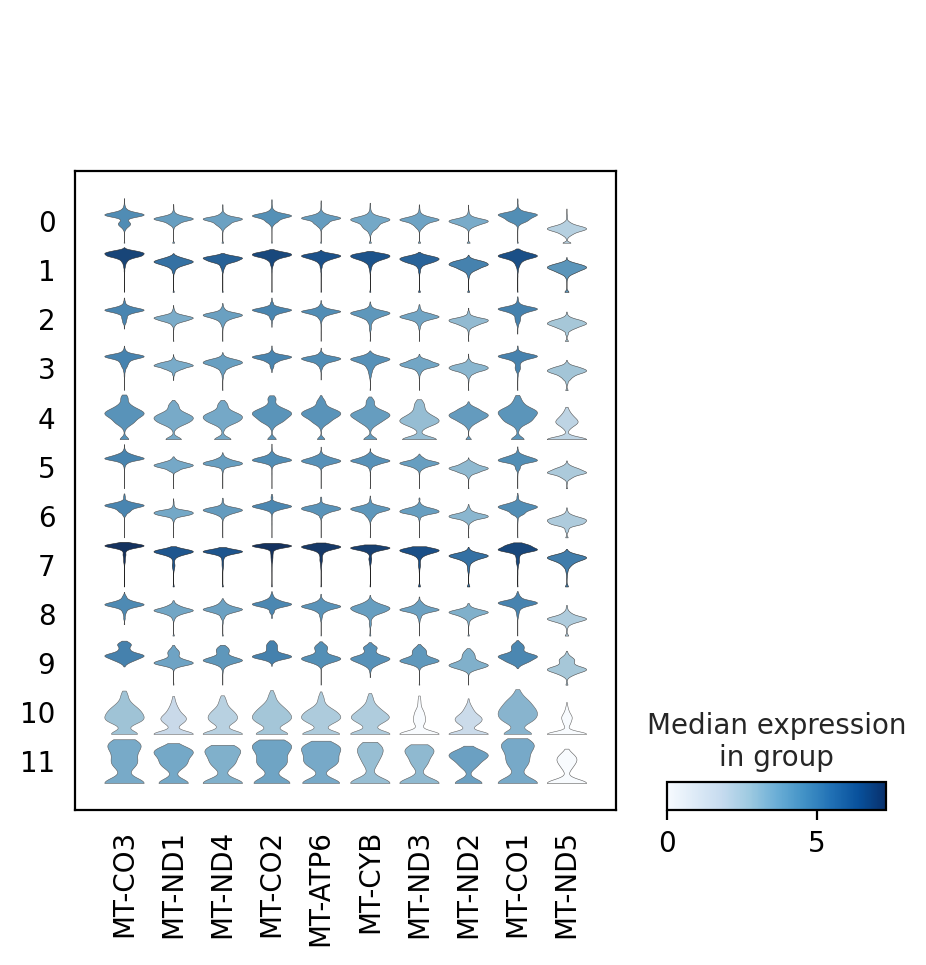

In [ ]:
# plot the same genes as violins across all the datasets.

# convert numpy.recarray to list
mynames = [x[0] for x in adata.uns['rank_genes_groups']['names'][:10]]
sc.pl.stacked_violin(adata, mynames, groupby = 'louvain_0.6')

###  Differential expression across conditions

The second way of computing differential expression is to answer which genes are differentially expressed within a cluster. For example, in our case we have libraries comming from patients and controls and we would like to know which genes are influenced the most in a particular cell type.

For this end, we will first subset our data for the desired cell cluster, then change the cell identities to the variable of comparison (which now in our case is the "type", e.g. Covid/Ctrl).

In [ ]:
cl1 = adata[adata.obs['louvain_0.6'] == '4',:]
cl1.obs['type'].value_counts()

Covid    858
Ctrl      54
Name: type, dtype: int64

ranking genes
    finished: added to `.uns['wilcoxon']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


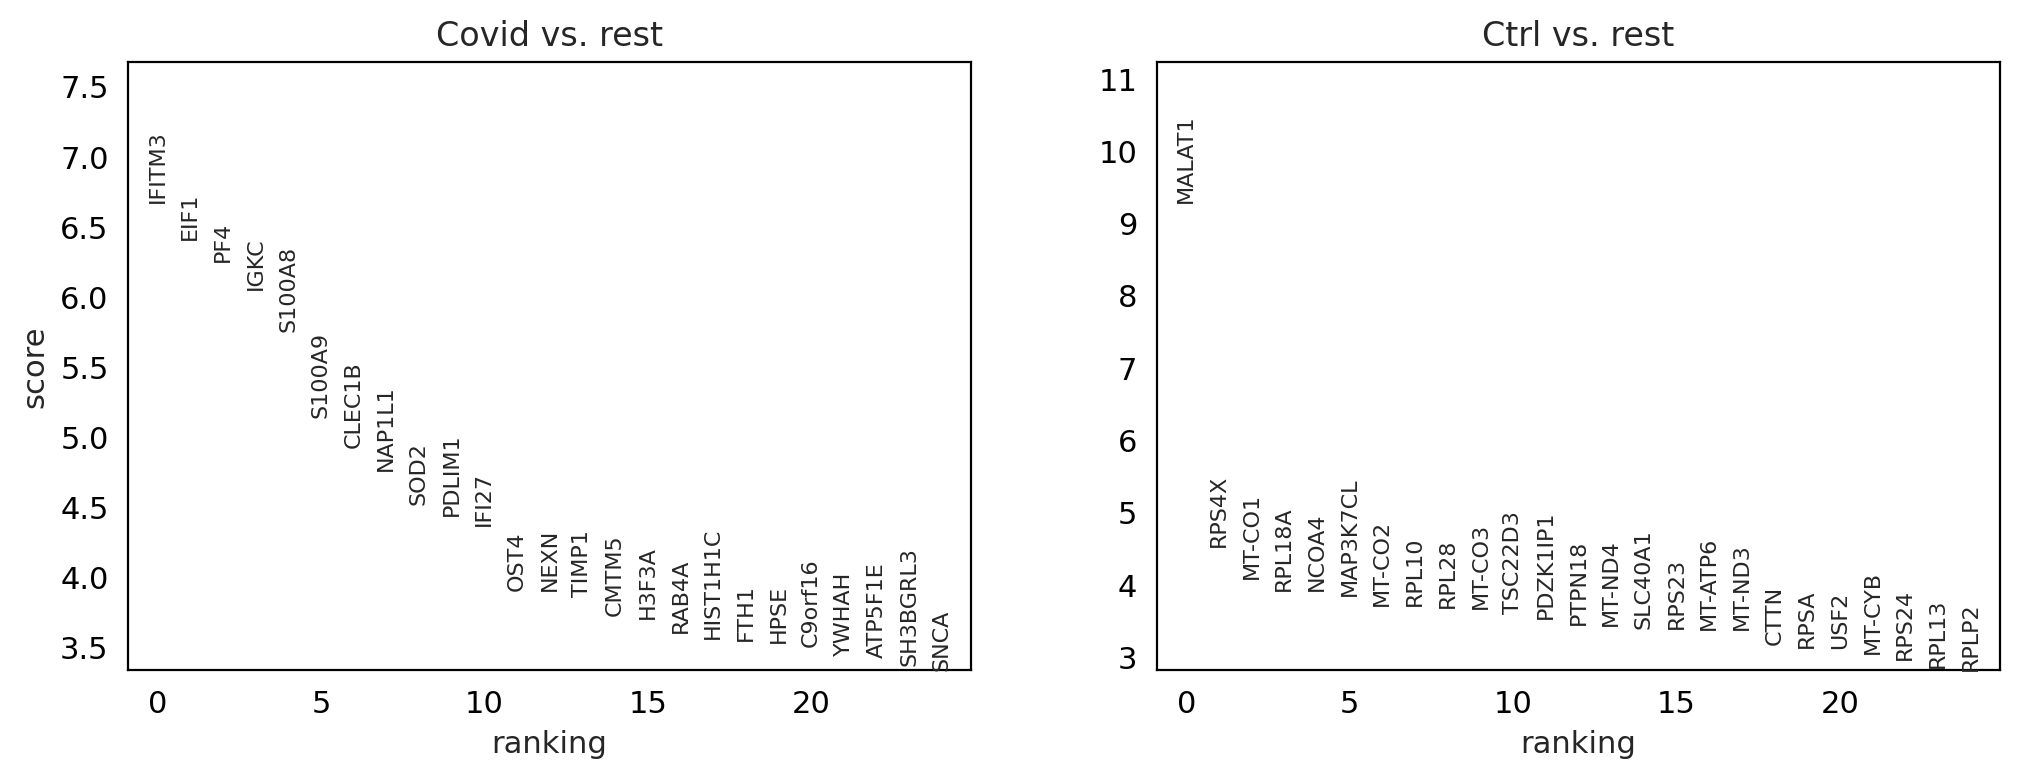

In [ ]:
sc.tl.rank_genes_groups(cl1, 'type', method='wilcoxon', key_added = "wilcoxon")
sc.pl.rank_genes_groups(cl1, n_genes=25, sharey=False, key="wilcoxon")

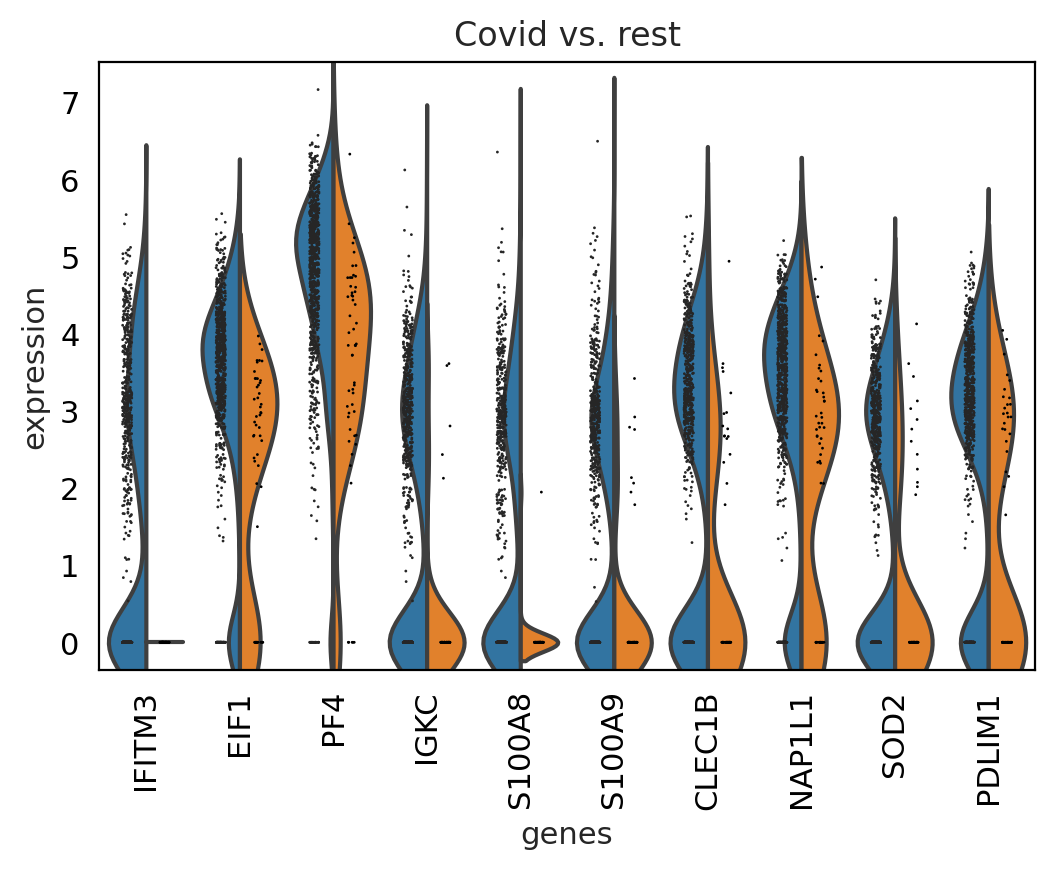

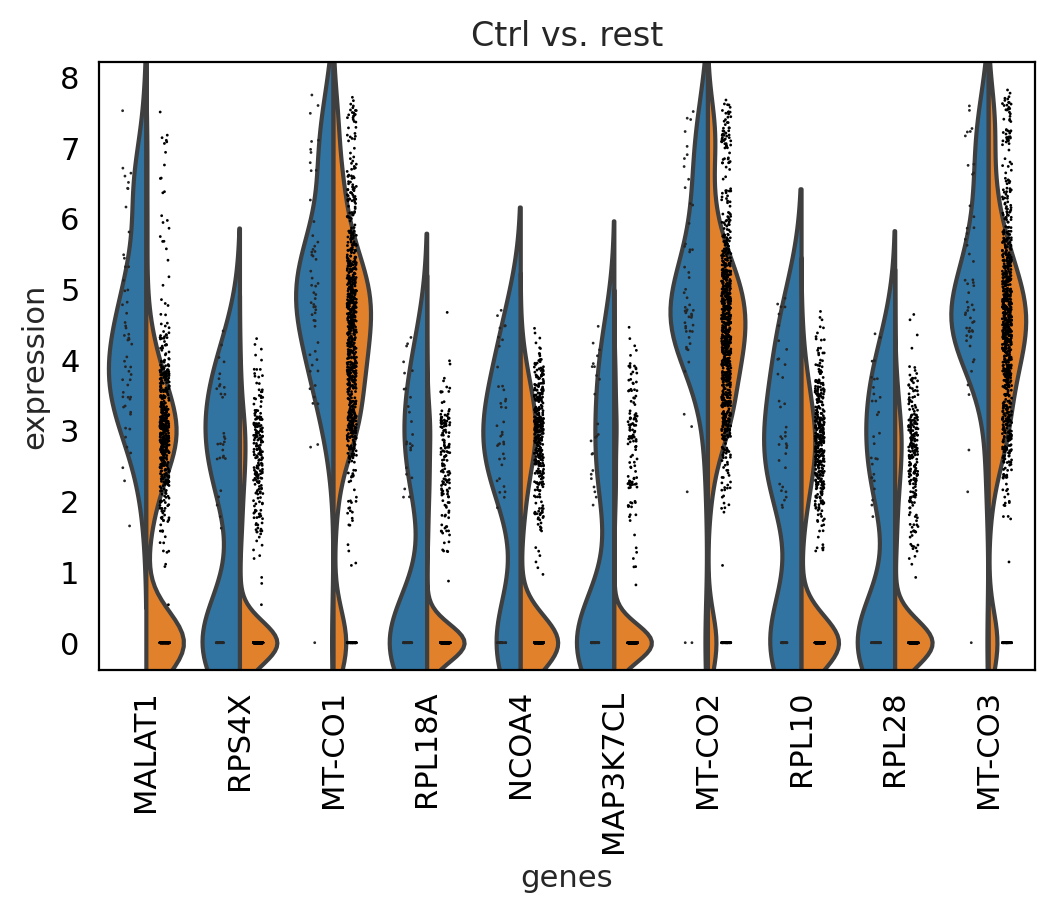

In [ ]:
sc.pl.rank_genes_groups_violin(cl1, n_genes=10, key="wilcoxon")

#### between cluster


In [ ]:
genes1 = sc.get.rank_genes_groups_df(cl1, group='Covid', key='wilcoxon')['names'][:5]
genes2 = sc.get.rank_genes_groups_df(cl1, group='Ctrl', key='wilcoxon')['names'][:5]
genes = genes1.tolist() +  genes2.tolist() 
df = sc.get.obs_df(adata, genes + ['louvain_0.6','type'], use_raw=False)
df2 = df.melt(id_vars=["louvain_0.6",'type'], value_vars=genes)

In [ ]:
df.head(3)

IFITM3      EIF1       PF4      IGKC    S100A8  \
AGGGTCCCATGACCCG-1-0  0.000000  3.430040  0.832491  2.727161  0.832491   
TACCCACAGCGGGTTA-1-0  1.381662  3.326245  1.174380  0.556972  5.466116   
CCCAACTTCATATGGC-1-0  0.000000  3.404340  2.370070  0.473830  5.096470   

                        MALAT1     RPS4X    MT-CO1    RPL18A     NCOA4  \
AGGGTCCCATGACCCG-1-0  6.177206  3.019721  4.874463  3.781191  0.000000   
TACCCACAGCGGGTTA-1-0  5.035670  3.118657  4.512954  3.403520  1.553268   
CCCAACTTCATATGGC-1-0  5.208613  3.500291  5.054821  3.424281  1.534025   

                     louvain_0.6   type  
AGGGTCCCATGACCCG-1-0           9  Covid  
TACCCACAGCGGGTTA-1-0           0  Covid  
CCCAACTTCATATGGC-1-0           0  Covid

In [ ]:
df2.head(3)

louvain_0.6   type variable     value
0           9  Covid   IFITM3  0.000000
1           0  Covid   IFITM3  1.381662
2           0  Covid   IFITM3  0.000000

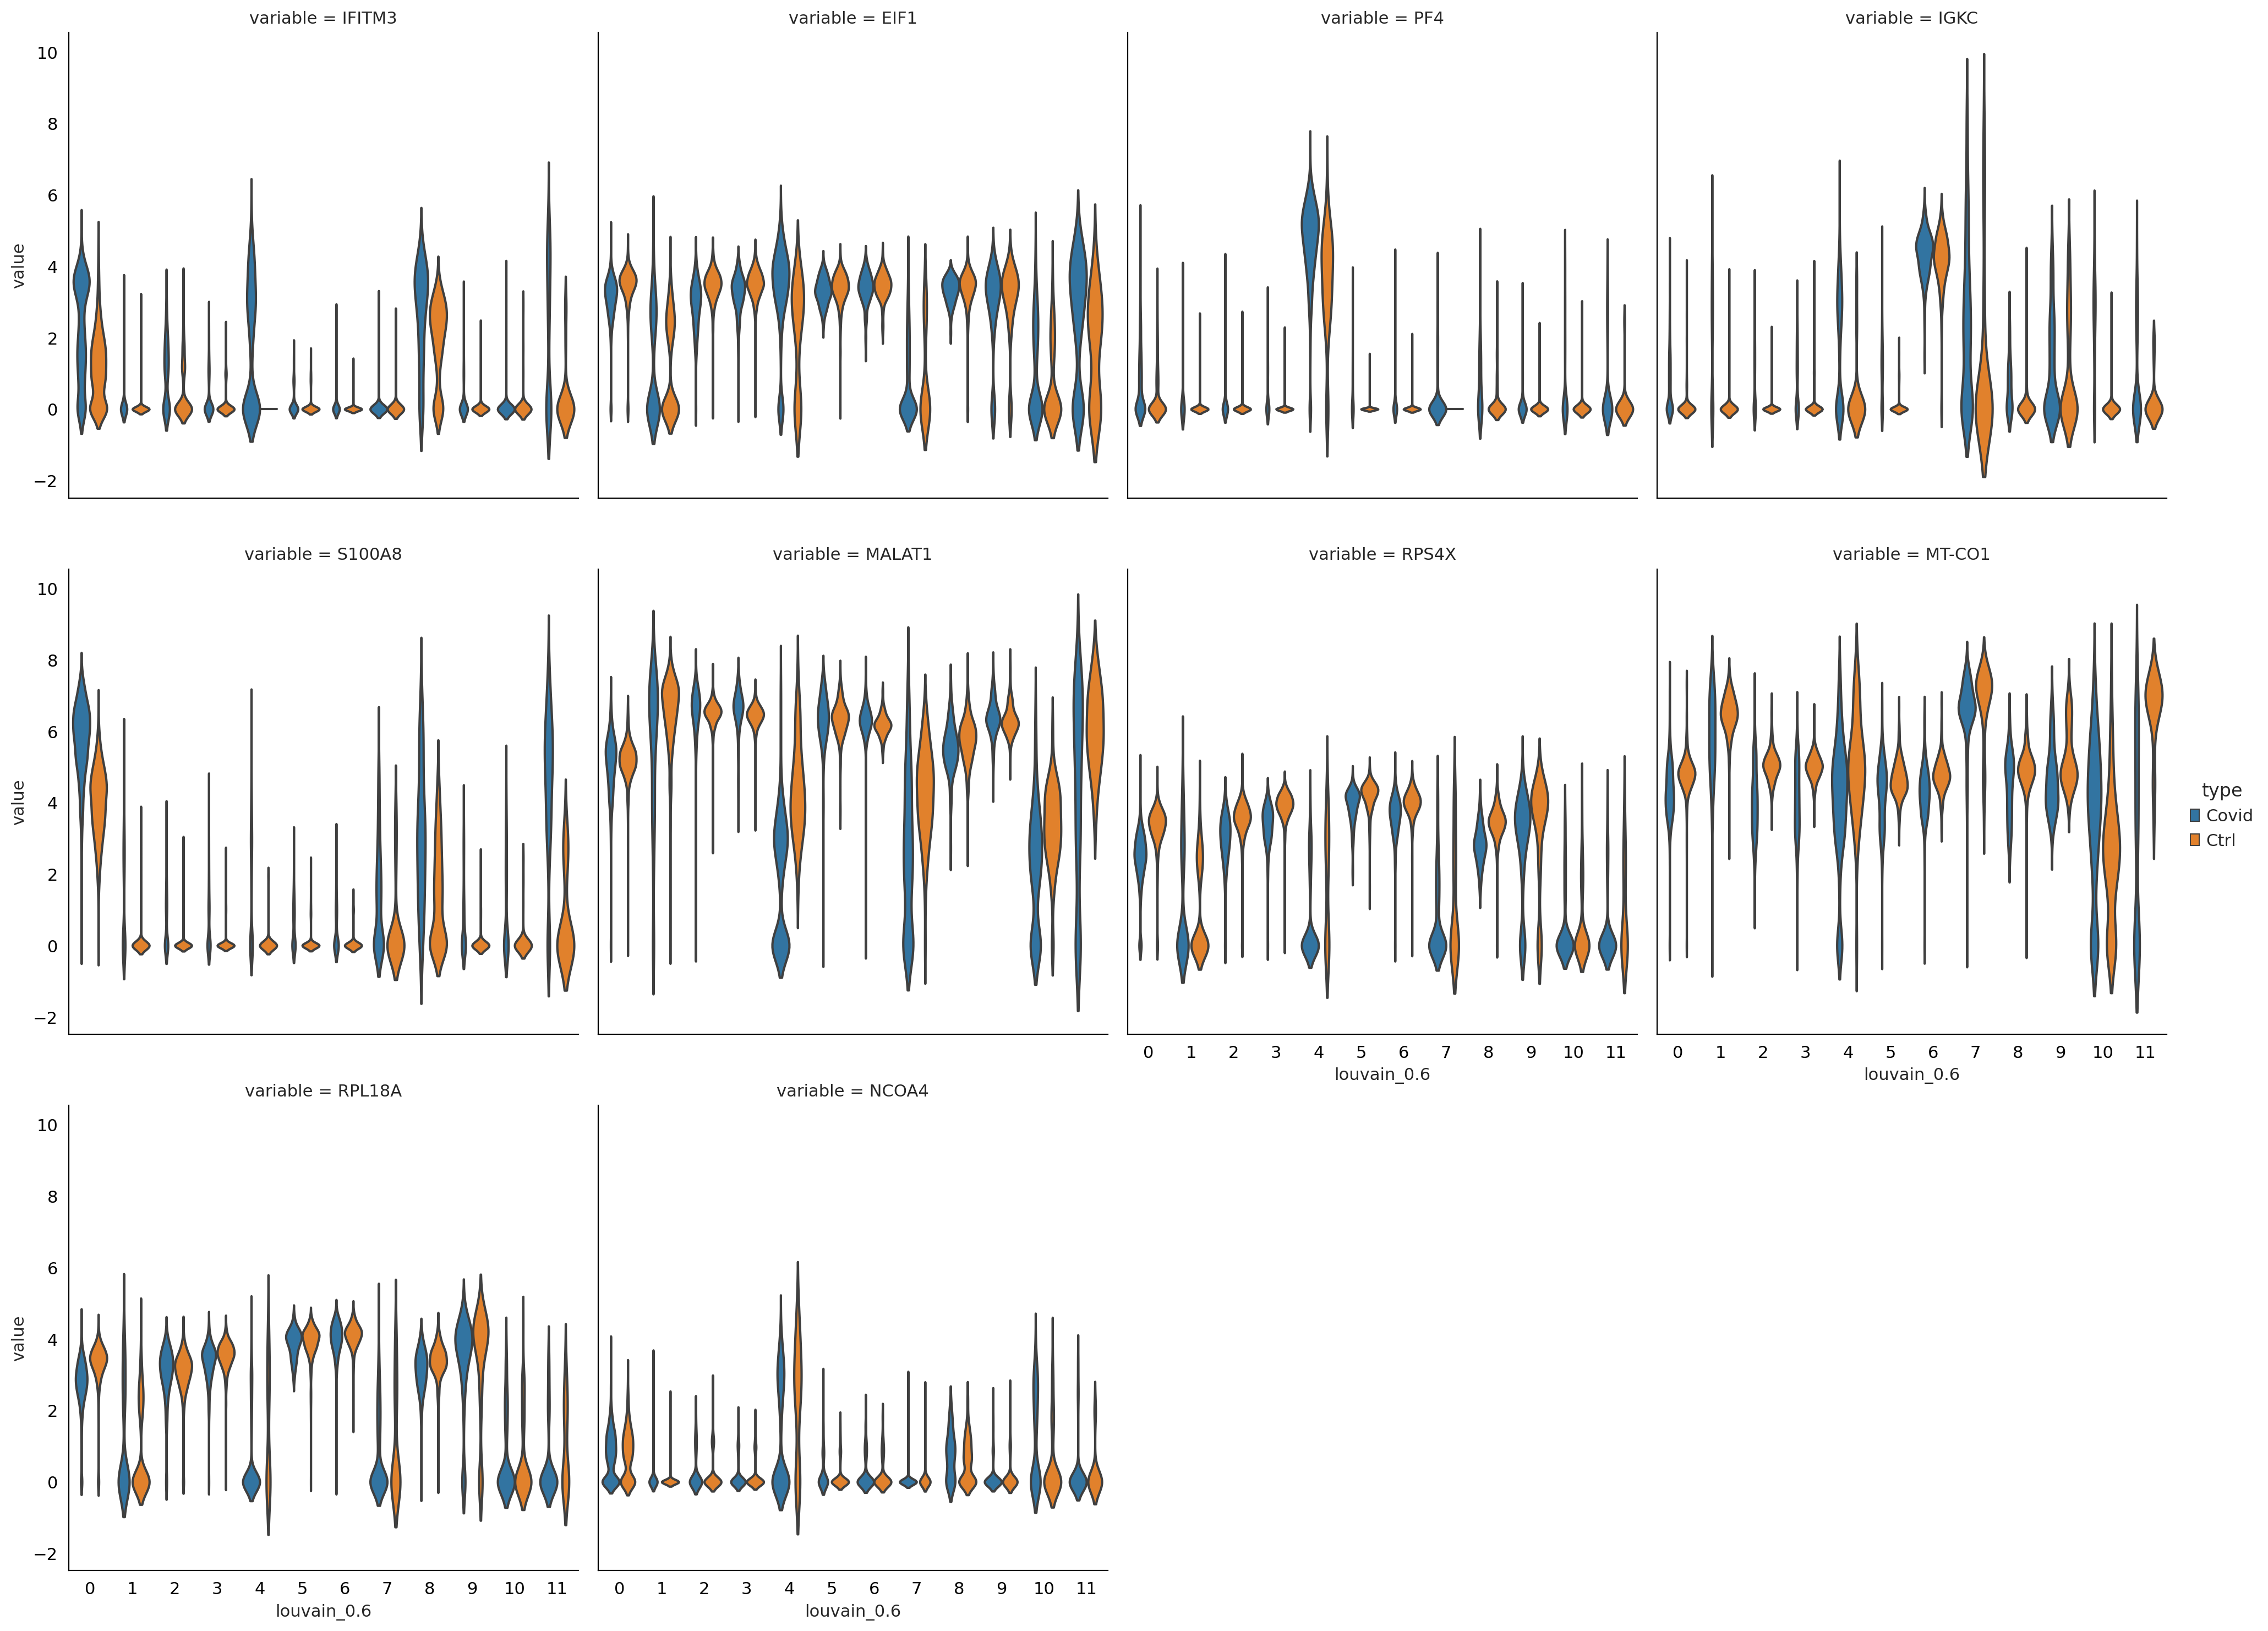

In [ ]:
sns.catplot(x = "louvain_0.6", y = "value", hue = "type", kind = 'violin', col = "variable", data = df2, col_wrap=4, inner=None)

In [ ]:
#@title remove sex genes and rerun differential expression




In [ ]:
annot = sc.queries.biomart_annotations(
        "hsapiens",
        ["ensembl_gene_id", "external_gene_name", "start_position", "end_position", "chromosome_name"],
    ).set_index("external_gene_name")

chrY_genes = adata.var_names.intersection(annot.index[annot.chromosome_name == "Y"])
chrX_genes = adata.var_names.intersection(annot.index[annot.chromosome_name == "X"])

In [ ]:
sex_genes = chrY_genes.union(chrX_genes)
print(len(sex_genes))
all_genes = cl1.var.index.tolist()
print(len(all_genes))

keep_genes = [x for x in all_genes if x not in sex_genes]
print(len(keep_genes))

cl1 = cl1[:,keep_genes]

991
33538
32547


ranking genes
    finished: added to `.uns['wilcoxon']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


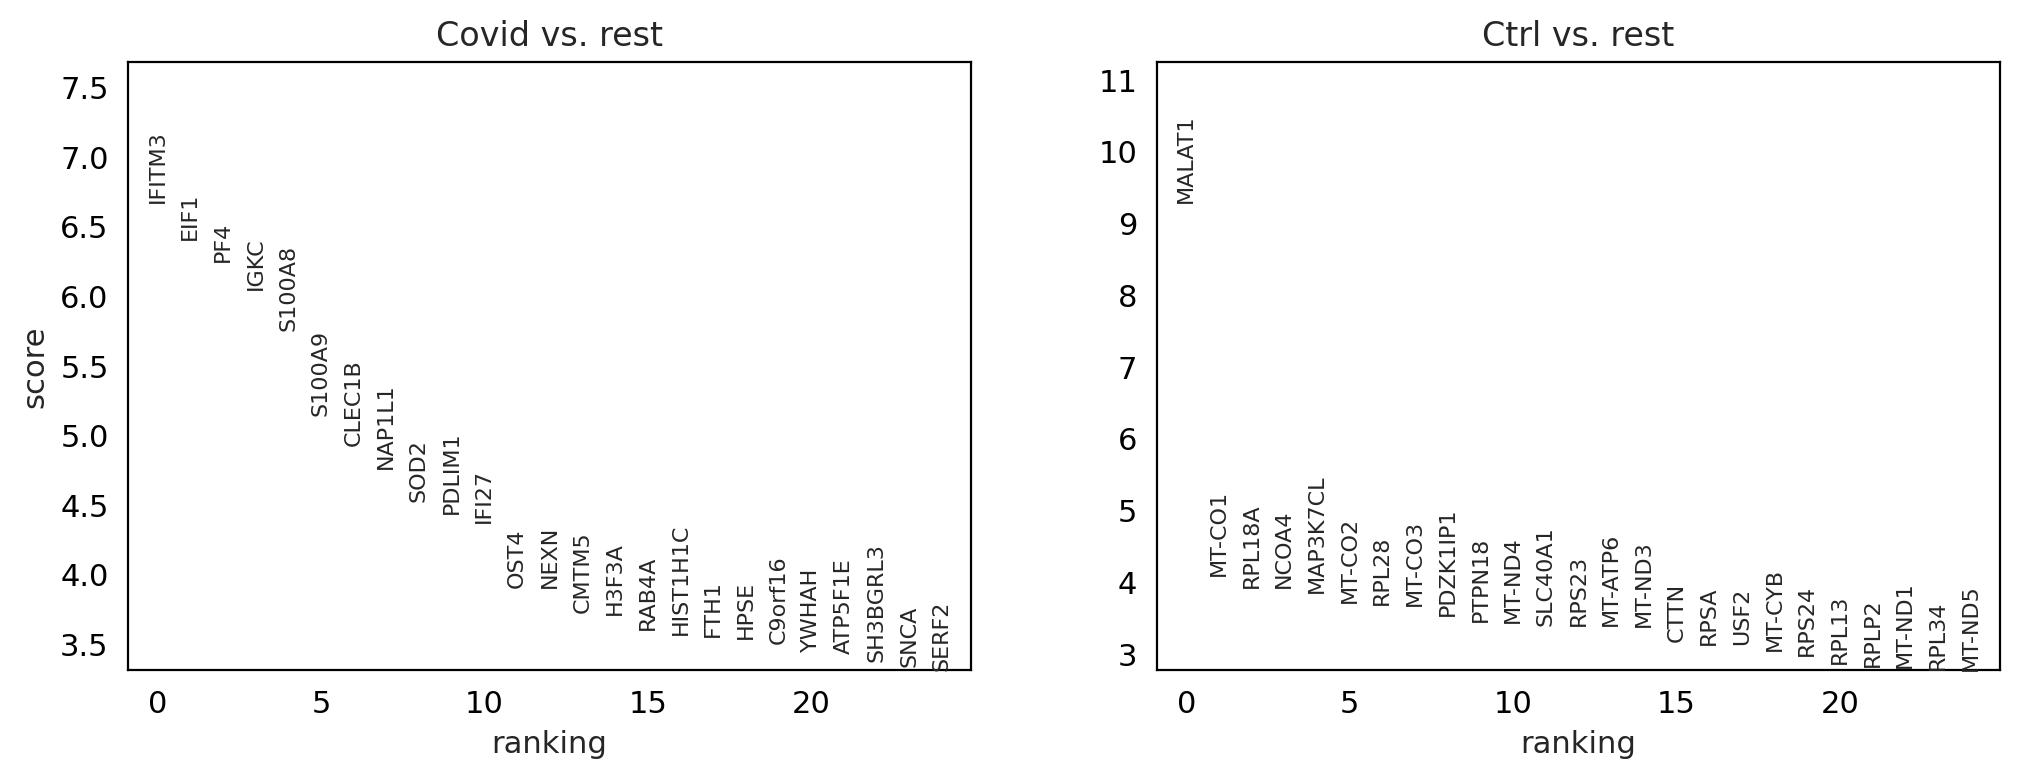

In [ ]:
sc.tl.rank_genes_groups(cl1, 'type', method='wilcoxon', key_added = "wilcoxon")
sc.pl.rank_genes_groups(cl1, n_genes=25, sharey=False, key="wilcoxon")

In [ ]:
#@title save differetial expressed data


save_file = 'Objects/sc_QCNFSDM_scCorrected__clustered_DGE_covid.h5ad'
adata.write_h5ad(save_file)